## Imports

In [1]:
import pandas as pd

from utility_processing import (
    quitar_asterisco,
    crear_lista_diccionarios,
    plot_metric,
    comparar_metricas,
    crear_datagramas_filtrados,
    crear_tabla_comparativa_para_formatos,
    crear_tabla_comparativa_para_modelos_yolo,
    crear_tabla_promedios_modelos_yolo,
    crear_tabla_promedios_dataset
)

In [2]:
results_path_1 = "training/results_4.csv"
results_path_2 = "training/results_5.csv"

# Read both CSV files
df1 = pd.read_csv(results_path_1)   # Sin transfer Learning
df2 = pd.read_csv(results_path_2)   # Con transfer Learning

# Concatenate them into a single DataFrame
df = pd.concat([df1, df2], ignore_index=True)
df["total_time"] = df["preprocess"] + df["inference"] + df["postprocess"]
df["FPS"] = 1000/df["inference"]
df["FPS_total"] = 1000/df["total_time"]

In [3]:
# Lista de modelos
modelos_yolov8 = ["yolov8n-seg", "yolov8n-seg*" "yolov8s-seg", "yolov8s-seg*", "yolov8m-seg",
                  "yolov8m-seg*", "yolov8l-seg", "yolov8l-seg*", "yolov8x-seg", "yolov8x-seg*"]
modelos_yolov9 = ["yolov9c-seg", "yolov9c-seg*", "yolov9e-seg", "yolov9e-seg*"]
modelos_yolo11 = ["yolo11n-seg", "yolo11n-seg*", "yolo11s-seg", "yolo11s-seg*", "yolo11m-seg",
                  "yolo11m-seg*", "yolo11l-seg", "yolo11l-seg*", "yolo11x-seg", "yolo11x-seg*"]

# Lista de modelos sin transfer learning
modelos_fl = ["yolov8n-seg", "yolov8s-seg","yolov8m-seg", "yolov8l-seg", "yolov8x-seg",
              "yolov9c-seg","yolov9e-seg", "yolo11n-seg", "yolo11s-seg", "yolo11m-seg",
              "yolo11l-seg", "yolo11x-seg"]

# Lista de modelos con transfer learning
modelos_tl = ["yolov8n-seg*", "yolov8s-seg*","yolov8m-seg*", "yolov8l-seg*", "yolov8x-seg*",
              "yolov9c-seg*","yolov9e-seg*","yolo11n-seg*", "yolo11s-seg*", "yolo11m-seg*",
              "yolo11l-seg*", "yolo11x-seg*"]

# Lista de ordenes
orden_yolov8 = ["yolov8n-seg", "yolov8s-seg", "yolov8m-seg", "yolov8l-seg", "yolov8x-seg"]
orden_yolov9 = ["yolov9c-seg", "yolov9e-seg"]
orden_yolo11 = ["yolo11n-seg", "yolo11s-seg", "yolo11m-seg", "yolo11l-seg", "yolo11x-seg"]
models_by_size = ["yolo11n-seg", "yolov8n-seg", "yolo11s-seg", "yolov8s-seg", "yolo11m-seg", "yolov8m-seg",
                  "yolov9c-seg", "yolo11l-seg", "yolov8l-seg", "yolov9e-seg", "yolo11x-seg", "yolov8x-seg"]
model_by_version = ["yolov8n-seg", "yolov8s-seg", "yolov8m-seg", "yolov8l-seg", "yolov8x-seg", "yolov9c-seg",
                    "yolov9e-seg", "yolo11n-seg", "yolo11s-seg", "yolo11m-seg", "yolo11l-seg", "yolo11x-seg"]

# Comparar datos

## Comparar según tamaño de modelo
Acá se busca ver que efecto tiene el tamaño del modelo en la calidad del mismo, además se trata de ver el efecto del uso de Transfer Learning (congelar capas al momento de entrenar). Para esto se agrupan los datos según su versión: YOLOv8, YOLOv9 y YOLOv11. Además se exluyen los casos de modelos exportados (Format != Pytorch). Se pueden analizar los modelos enternados con Transfer Learning, sin Transfer Learning o ambos juntos.

### Creamos los diferentes datagramas a usar

In [4]:
# Datagrama solo con casos en formato Pytorch
df_pytorch = df[df["Format"].isin(["Pytorch"])].copy()
df_tensor32 = df[df["Format"].isin(["TensorRT-F32"])].copy()
df_tensor16 = df[df["Format"].isin(["TensorRT-F16"])].copy()
df_tensor8 = df[df["Format"].isin(["TensorRT-INT8"])].copy()

# Con Transfer Learning
df_pytorch_tl = quitar_asterisco(df_pytorch, modelos_tl)
df_tensor8_tl = quitar_asterisco(df_tensor8, modelos_tl)
# Sin Transfer Learning
df_pytorch_fl = quitar_asterisco(df_pytorch, modelos_fl)
df_tensor8_fl = quitar_asterisco(df_tensor8, modelos_fl)
# Ambos casos
df_pytorch_tt = quitar_asterisco(df_pytorch, modelos_tl+modelos_fl)
df_tensor32_tt = quitar_asterisco(df_tensor32, modelos_tl+modelos_fl)
df_tensor16_tt = quitar_asterisco(df_tensor16, modelos_tl+modelos_fl)
df_tensor8_tt = quitar_asterisco(df_tensor8, modelos_tl+modelos_fl)

# Versiones sin outliers
df_pytorch_tt_thr = df_pytorch_tt[df_pytorch_tt["F1_score(M)"] >= 0.6]
df_pytorch_fl_thr = df_pytorch_fl[df_pytorch_fl["F1_score(M)"] >= 0.6]
df_pytorch_tl_thr = df_pytorch_tl[df_pytorch_tl["F1_score(M)"] >= 0.6]
df_tensor32_tt_thr = df_tensor32_tt[df_tensor32_tt["F1_score(M)"] >= 0.6]
df_tensor16_tt_thr = df_tensor16_tt[df_tensor16_tt["F1_score(M)"] >= 0.6]
df_tensor8_tt_thr = df_tensor8_tt[df_tensor8_tt["F1_score(M)"] >= 0.6]
df_tensor8_fl_thr = df_tensor8_fl[df_tensor8_fl["F1_score(M)"] >= 0.6]
df_tensor8_tl_thr = df_tensor8_tl[df_tensor8_tl["F1_score(M)"] >= 0.6]

# Otros más
df_fl = quitar_asterisco(df, modelos_fl)
df_fl["TransferLearning"] = False 
df_tl = quitar_asterisco(df, modelos_tl)
df_tl["TransferLearning"] = True

df_updated = pd.concat([df_fl, df_tl])
df_updated["Model"] = df_updated["Model"].str.replace("*", "", regex=False)

In [5]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_pytorch_tl_thr, df_pytorch_fl_thr]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]

### Por Modelo

#### YOLOv8

In [6]:
order = orden_yolov8
label = ["YOLOv8"]
plot_dict_yolov8 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

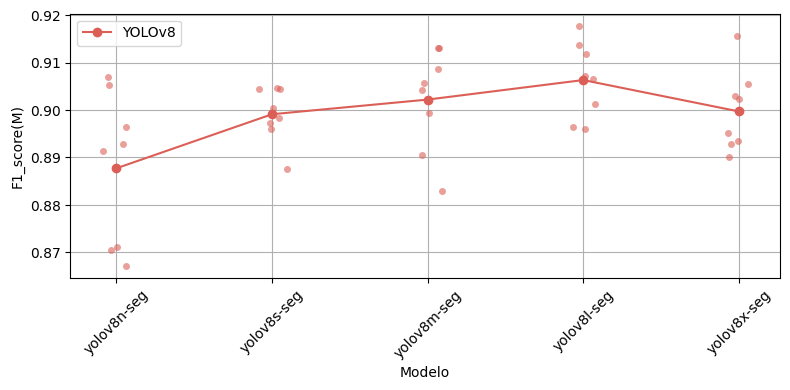

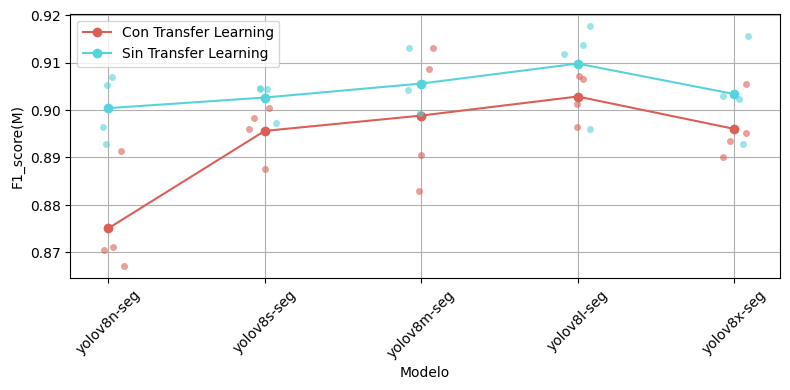

In [7]:
figuras_yolov8_f1score = [plot_metric(**plot_dict_yolov8[0]), plot_metric(**plot_dict_yolov8[1])]

##### mAP50(M)

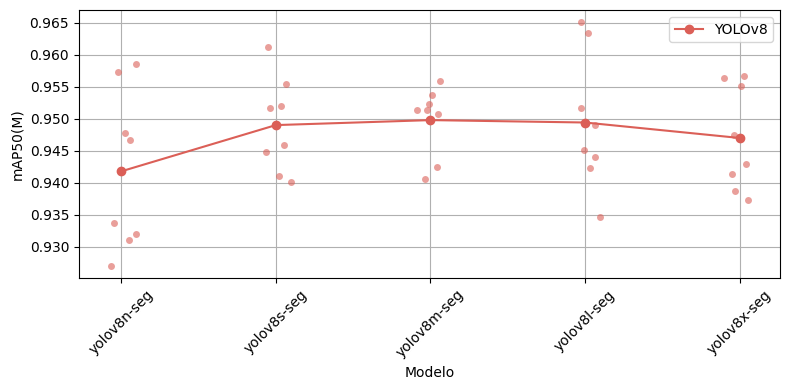

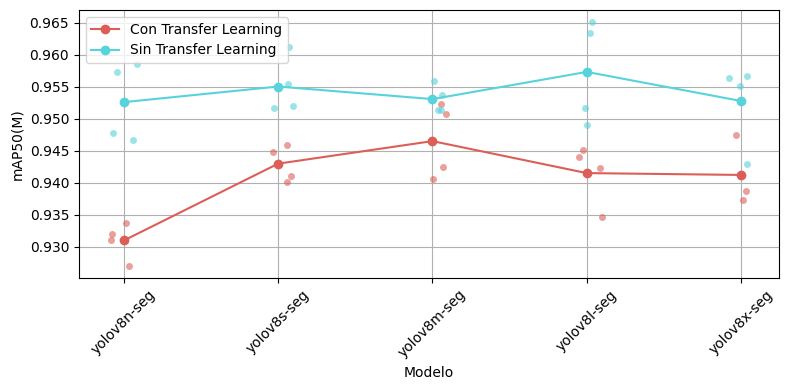

In [8]:
figuras_yolov8_map50 = [plot_metric(**plot_dict_yolov8[2]), plot_metric(**plot_dict_yolov8[3])]

##### mAP50-95(M)

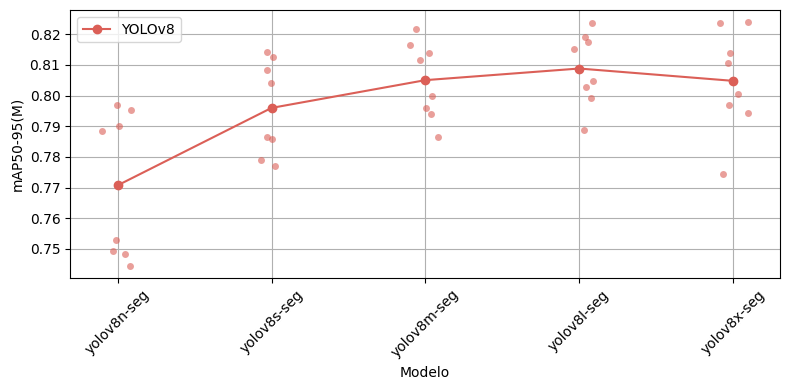

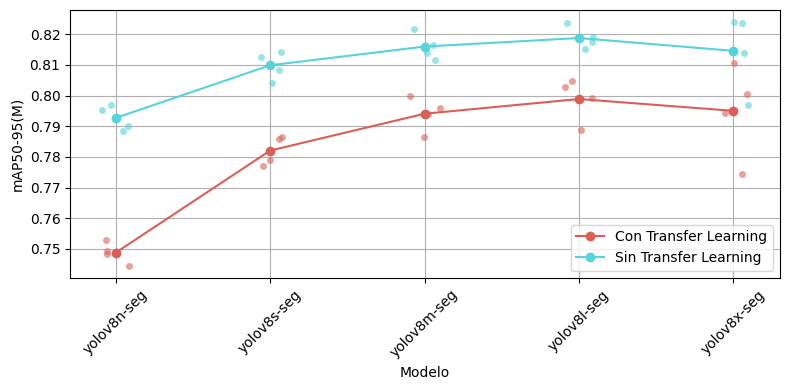

In [9]:
figuras_yolov8_map5095 = [plot_metric(**plot_dict_yolov8[4]), plot_metric(**plot_dict_yolov8[5])]

#### YOLOv9

In [10]:
order = orden_yolov9
label = ["YOLOv9"]

plot_dict_yolov9 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

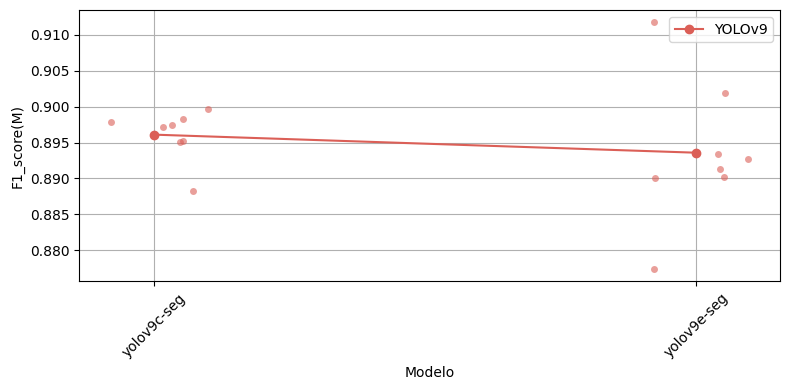

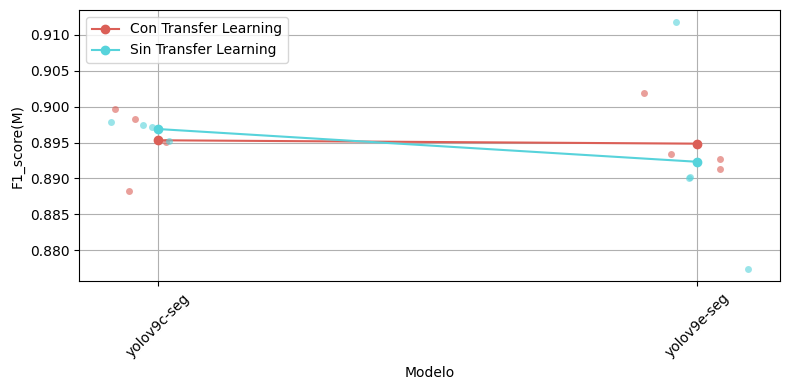

In [11]:
figuras_yolov9_f1score = [plot_metric(**plot_dict_yolov9[0]), plot_metric(**plot_dict_yolov9[1])]

##### mAP50(M)

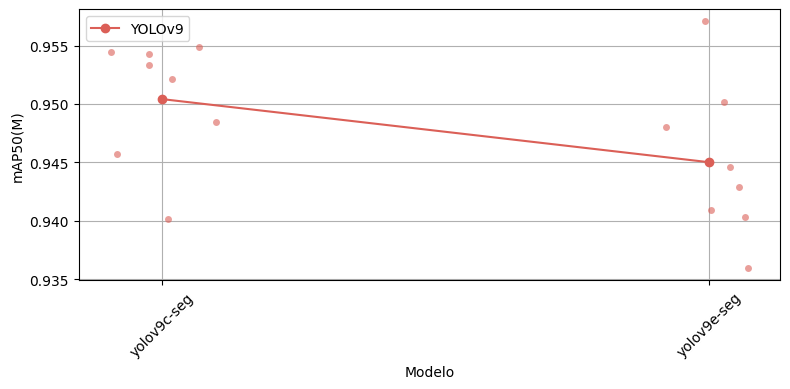

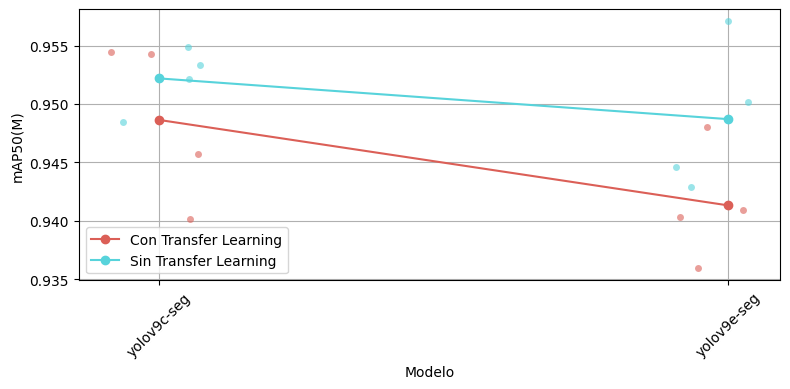

In [12]:
figuras_yolov9_map50 = [plot_metric(**plot_dict_yolov9[2]), plot_metric(**plot_dict_yolov9[3])]

##### mAP50-95(M)

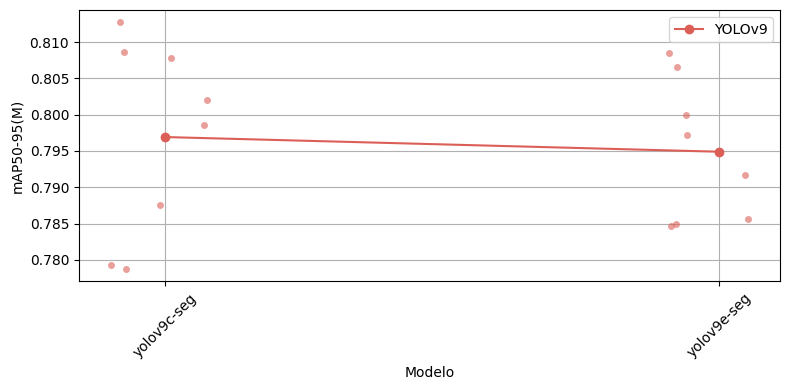

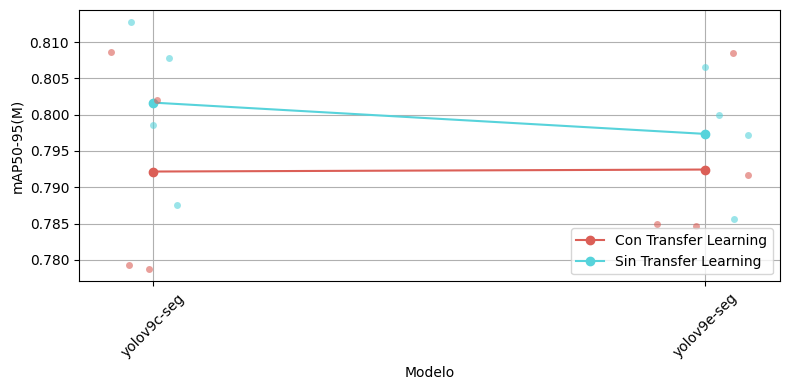

In [13]:
figuras_yolov9_map5095 = [plot_metric(**plot_dict_yolov9[4]), plot_metric(**plot_dict_yolov9[5])]

#### YOLOv11

In [14]:
order = orden_yolo11
label = ["YOLOv11"]

plot_dict_yolo11 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

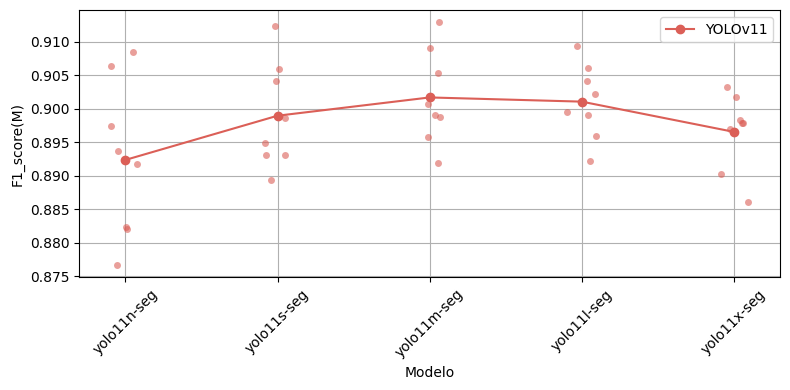

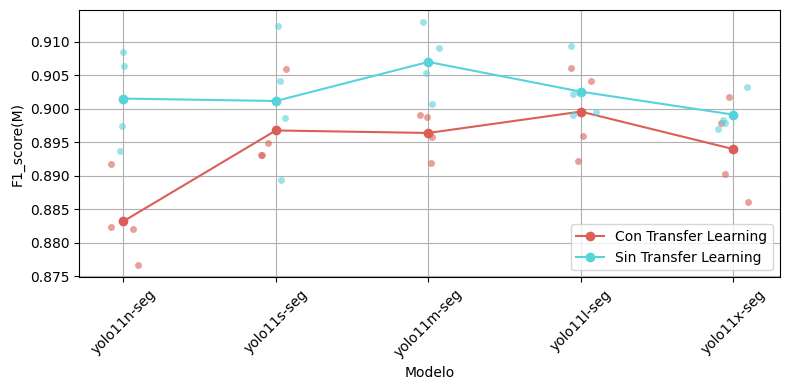

In [15]:
figuras_yolo11_f1score = [plot_metric(**plot_dict_yolo11[0]), plot_metric(**plot_dict_yolo11[1])]

##### mAP50(M)

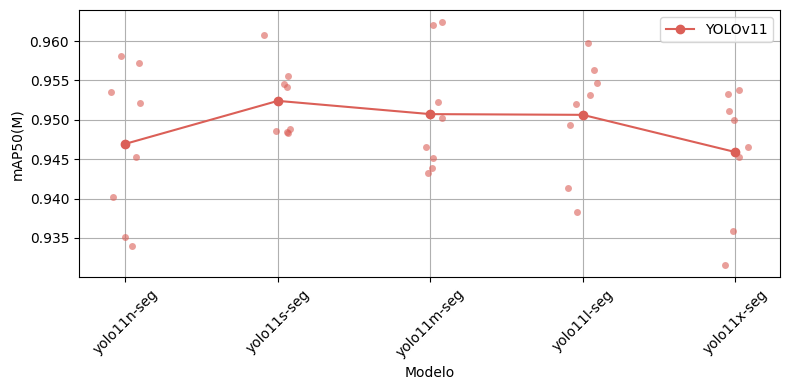

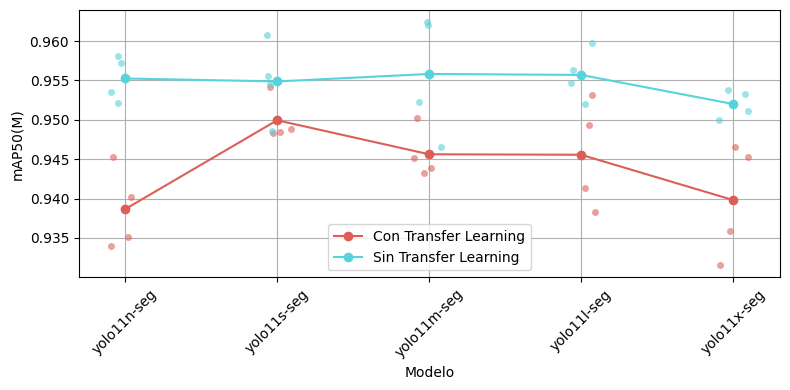

In [16]:
figuras_yolo11_map50 = [plot_metric(**plot_dict_yolo11[2]), plot_metric(**plot_dict_yolo11[3])]

##### mAP50-95(M)

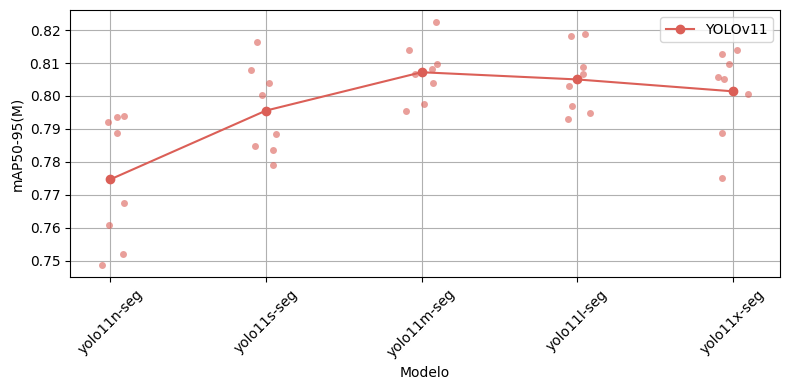

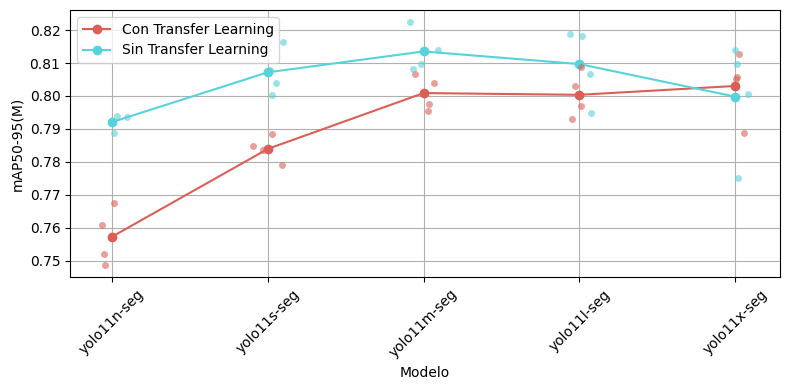

In [17]:
figuras_yolo11_map5095 = [plot_metric(**plot_dict_yolo11[4]), plot_metric(**plot_dict_yolo11[5])]

### Todos juntos

In [18]:
order = models_by_size
label = ["Promedio"]

plot_dict_yolo_todos = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

#### F1_score(M)

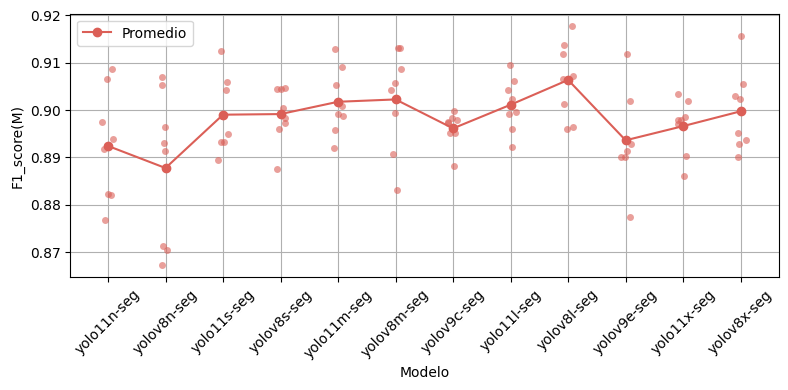

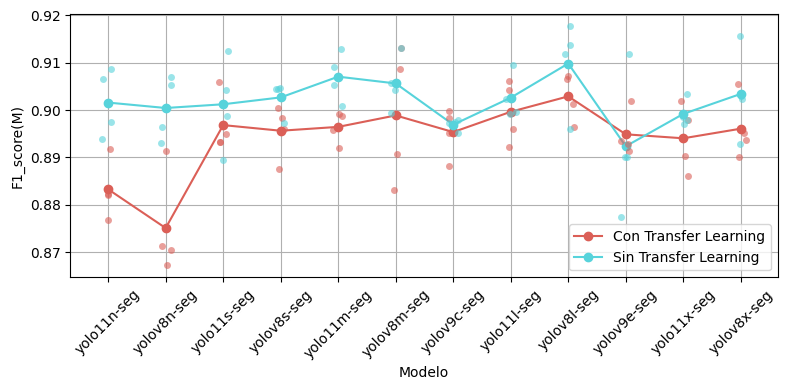

In [19]:
figuras_yolo_f1score = [plot_metric(**plot_dict_yolo_todos[0]), plot_metric(**plot_dict_yolo_todos[1])]

#### mAP50(M)

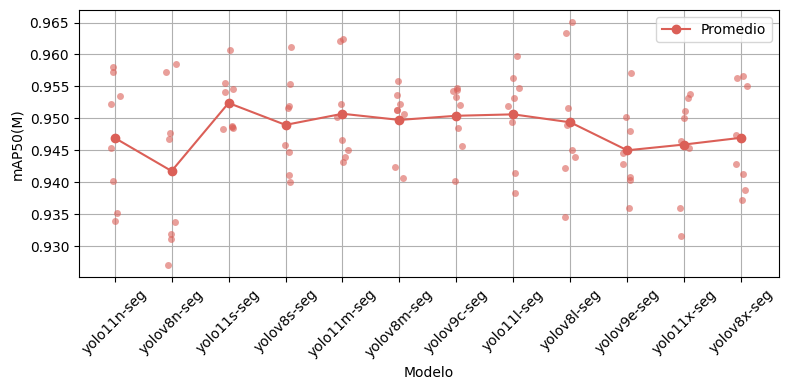

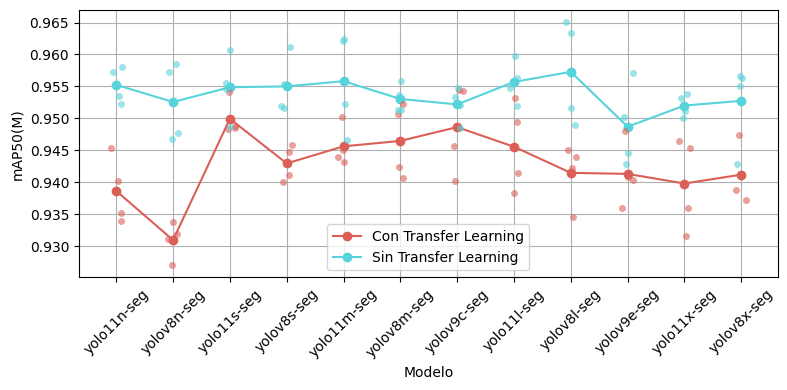

In [20]:
figuras_yolo_map50 = [plot_metric(**plot_dict_yolo_todos[2]), plot_metric(**plot_dict_yolo_todos[3])]

#### mAP50-90(M)

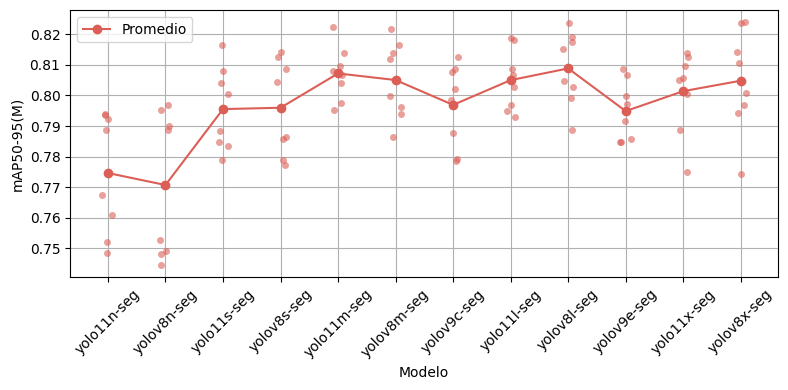

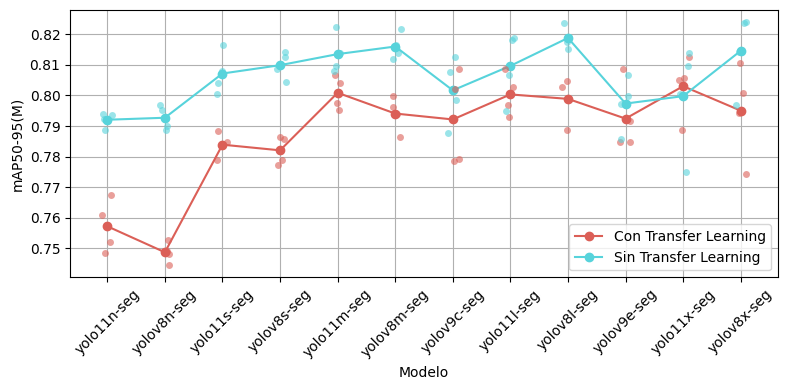

In [21]:
figuras_yolo_map5095 = [plot_metric(**plot_dict_yolo_todos[4]), plot_metric(**plot_dict_yolo_todos[5])]

#### Comparar por Formato (Todos)

In [22]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_pytorch_tt_thr, df_tensor32_tt_thr, df_tensor16_tt_thr, df_tensor8_tt_thr]
group = ["Model"]
groups = ["Model", "Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Pytorch", "Float32", "Float16", "INT8"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = models_by_size
label = ["Promedio"]

plot_dict_yolo_todos_format = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

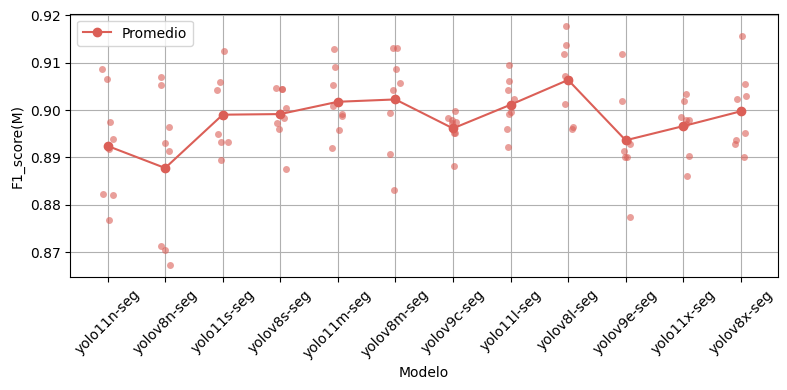

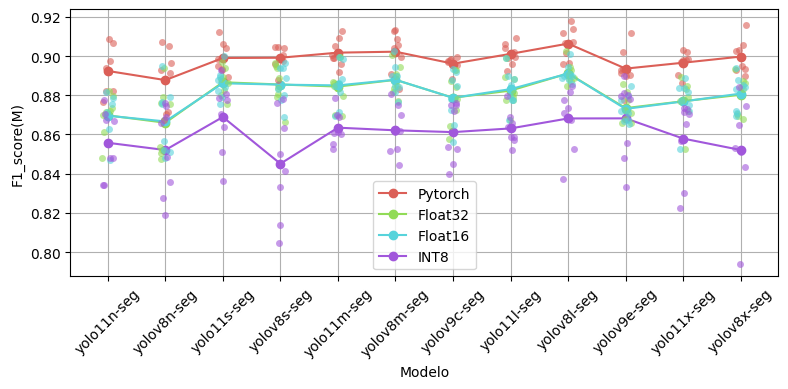

In [23]:
figuras_yolo_format_f1score = [plot_metric(**plot_dict_yolo_todos_format[0]), plot_metric(**plot_dict_yolo_todos_format[1])]

##### mAP50(M)

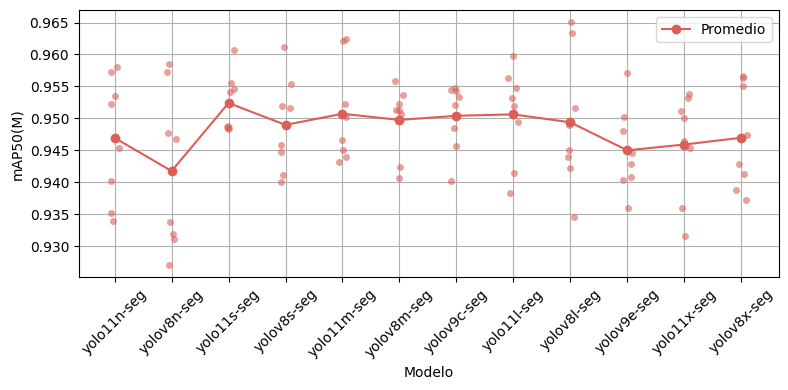

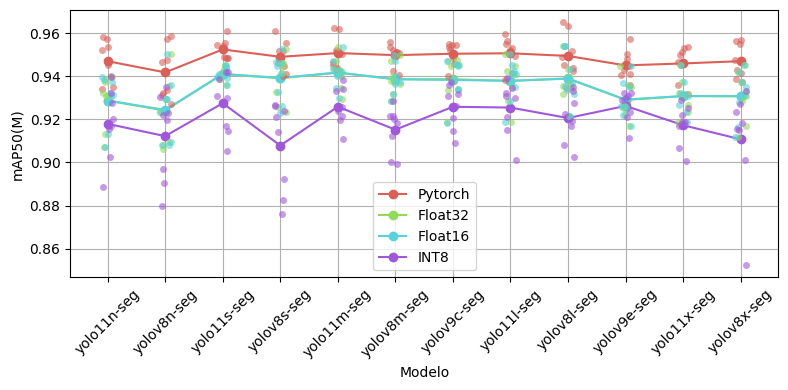

In [24]:
figuras_yolo_format_map50 = [plot_metric(**plot_dict_yolo_todos_format[2]), plot_metric(**plot_dict_yolo_todos_format[3])]

##### mAP50-95(M)

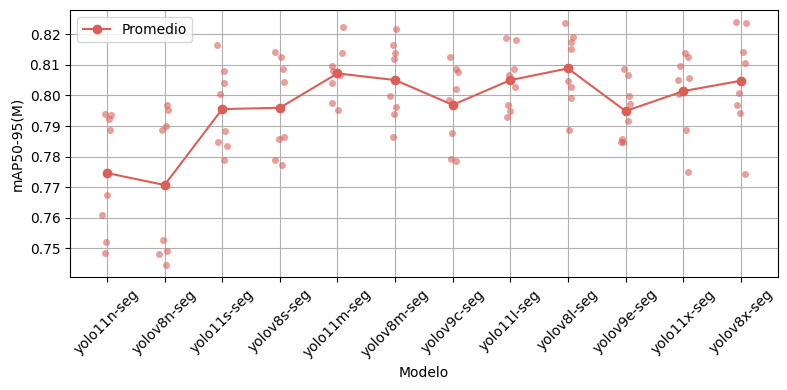

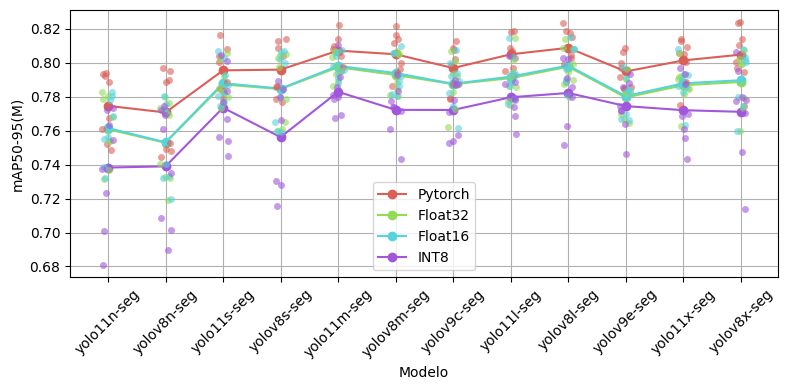

In [25]:
figuras_yolo_format_map5095 = [plot_metric(**plot_dict_yolo_todos_format[4]), plot_metric(**plot_dict_yolo_todos_format[5])]

#### Comparar por Formato (Con y sin Transfer Learning)

In [26]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_tensor8_tl, df_tensor8_fl]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = models_by_size
label = ["Promedio"]
title = "Resultados con exportación TensorRT-INT8"

plot_dict_yolo_todos_int8_tl = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

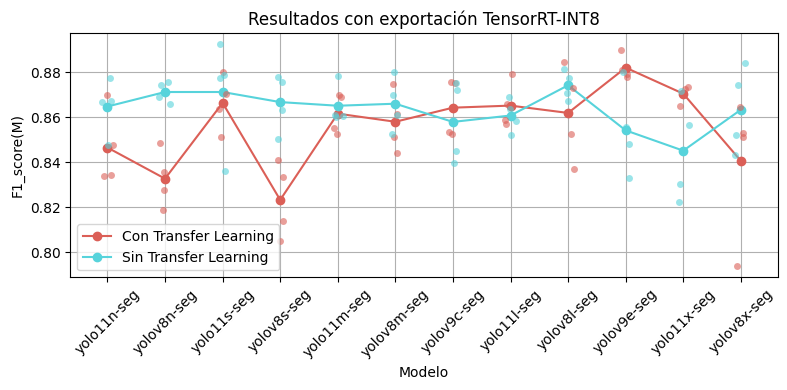

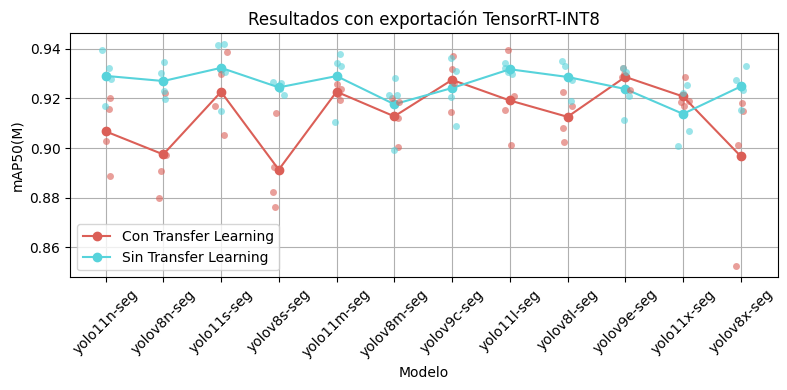

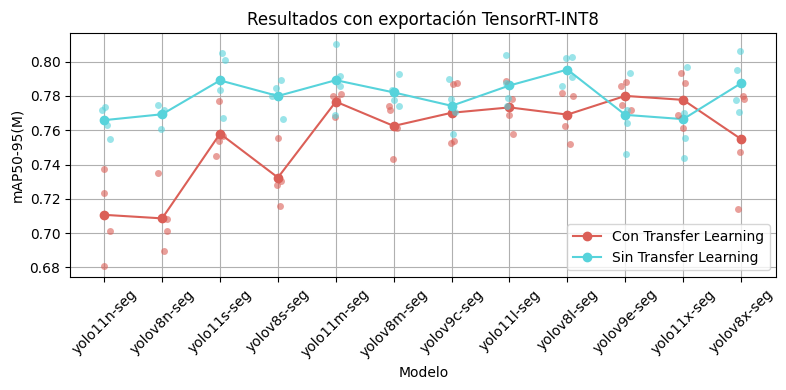

In [27]:
figuras_yolo__todos_int8_map5095 = [plot_metric(**plot_dict_yolo_todos_int8_tl[1]), plot_metric(**plot_dict_yolo_todos_int8_tl[3]), plot_metric(**plot_dict_yolo_todos_int8_tl[5])]

## Conclusiones de comparación según tamaño de modelo:

1) El tamaño del modelo si tiene un efecto importante en la calidad del modelo entrenado, pero más grande no significa mejor. Parece ser que el uso de transfer learning aprovecha al máximo el tamaño del modelo, pues en estos casos si existe una tendencia clara a la mejora al incrementar el tamaño del modelo.
2) Respecto al efecto del uso de Transfer Learning: existe una gran diferencia entre su uso y no uso, transfer learning es en casi todos los casos inferior al entrenamiento completo. Solo en modelos grandes y usando exportación con TensorRT-INT8 es que es dificil determinar si uno es superior al otro.

## Comparar según optimizador

### Tablas con diferencias

Se comparará el rendimiento de SGD y AdamW para determinar cual es mejor, en promedio. Las metricas a evaluar son F1_score(M), mAP50(M), mAP50-95(M) y fitness. Se separarán en varios casos:
1) Promedio global.
3) Promedio por versión de modelo.
4) Promedio por modelo específico.

Para cada caso además se realizarán las siguientes variantes.
1. Incluyendo y excluyendo exportaciones.
2. Incluyendo y excluyendo outliers (no hay para Salmones).

In [28]:
# Datagrama sin asteriscos Combinados totales (la unica diff con df es el asterisco)
df_tt = df_updated.copy()
df_tt["Model"] = df_tt["Model"].str.replace("*", "", regex=False)

# Datagrama solo con casos de optimizador SGD y AdamW
df_SGD = df_tt[df_tt["Optimizer"].isin(["SGD"])].copy().reset_index(drop=True)
df_AdamW = df_tt[df_tt["Optimizer"].isin(["AdamW"])].copy().reset_index(drop=True)

# Parametros para comparar
columna_1 = "Format"
columna_2 = "Model"
opciones_1 = ["Pytorch", "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
opciones_2 = models_by_size
casos_a_comparar = ["AdamW", "SGD"]

# Comparar por Formato
resultados_1 = comparar_metricas(datagrama=df_updated, columna="Optimizer", casos_a_comparar=casos_a_comparar)
mean_diff_by_format, mean_diff_r_by_format, mean_diff_m_by_format, mean_diff_re_by_format = crear_datagramas_filtrados(resultados_1, columna_1, opciones_1)

# Comparar por Modelo
resultados_2 = comparar_metricas(datagrama=df_tt, columna="Optimizer", casos_a_comparar=casos_a_comparar)
diff_df_all, diff_df_thr, mejora_rel_df_all, mejora_rel_df_thr, factor_df_all, factor_df_thr, reduccion_error_df_all, reduccion_error_df_thr = resultados_2
mean_diff_by_model, mean_diff_r_by_model, mean_diff_m_by_model, mean_diff_re_by_model = crear_datagramas_filtrados(resultados_2, columna_2, opciones_2, orden=model_by_version)

#### Comparación por formato

In [29]:
print("Diferencia entre SGD y AdamW, por formato de exportación.")
mean_diff_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Diferencia entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     0.000776  0.000096     0.009547  0.018057        Pytorch     True
1     0.001432  0.001855     0.009748  0.018322   TensorRT-F32     True
2     0.001568  0.001908     0.009999  0.018748   TensorRT-F16     True
3     0.007067  0.005873     0.018198  0.037285  TensorRT-INT8     True
4     0.002711  0.002433     0.011873  0.023103          Todos     True
5     0.000776  0.000096     0.009547  0.018057        Pytorch    False
6     0.001432  0.001855     0.009748  0.018322   TensorRT-F32    False
7     0.001568  0.001908     0.009999  0.018748   TensorRT-F16    False
8     0.007067  0.005873     0.018198  0.037285  TensorRT-INT8    False
9     0.002711  0.002433     0.011873  0.023103          Todos    False

In [30]:
print("Diferencia porcentual entre SGD y AdamW, por formato de exportación.")
mean_diff_r_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Diferencia porcentual entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     0.081298  0.009087     1.182170  1.066296        Pytorch     True
1     0.148395  0.195212     1.222696  1.093574   TensorRT-F32     True
2     0.163400  0.200700     1.252132  1.118824   TensorRT-F16     True
3     0.804530  0.630511     2.339822  2.288413  TensorRT-INT8     True
4     0.299406  0.258878     1.499205  1.391777          Todos     True
5     0.081298  0.009087     1.182170  1.066296        Pytorch    False
6     0.148395  0.195212     1.222696  1.093574   TensorRT-F32    False
7     0.163400  0.200700     1.252132  1.118824   TensorRT-F16    False
8     0.804530  0.630511     2.339822  2.288413  TensorRT-INT8    False
9     0.299406  0.258878     1.499205  1.391777          Todos    False

In [31]:
# TODO: Datos importantes!!
print("Factor de mejora entre SGD y AdamW, por formato de exportación.")
mean_diff_m_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Factor de mejora entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     1.000905  1.000132     1.012125  1.010926        Pytorch     True
1     1.001709  1.002062     1.012591  1.011277   TensorRT-F32     True
2     1.001856  1.002117     1.012900  1.011536   TensorRT-F16     True
3     1.008536  1.006641     1.024416  1.023897  TensorRT-INT8     True
4     1.003251  1.002738     1.015508  1.014409          Todos     True
5     1.000905  1.000132     1.012125  1.010926        Pytorch    False
6     1.001709  1.002062     1.012591  1.011277   TensorRT-F32    False
7     1.001856  1.002117     1.012900  1.011536   TensorRT-F16    False
8     1.008536  1.006641     1.024416  1.023897  TensorRT-INT8    False
9     1.003251  1.002738     1.015508  1.014409          Todos    False

In [32]:
print("Reducción del loss entre SGD y AdamW, por formato de exportación.")
mean_diff_re_by_format[["loss", "Format", "Outlier"]].reset_index(drop=True)

Reducción del loss entre SGD y AdamW, por formato de exportación.


loss         Format  Outlier
0 -0.678237        Pytorch     True
1 -0.012281   TensorRT-F32     True
2 -0.032186   TensorRT-F16     True
3 -0.002446  TensorRT-INT8     True
4 -0.181288          Todos     True
5 -0.678237        Pytorch    False
6 -0.012281   TensorRT-F32    False
7 -0.032186   TensorRT-F16    False
8 -0.002446  TensorRT-INT8    False
9 -0.181288          Todos    False

#### Comparación por modelo

In [33]:
print("Diferencia entre SGD y AdamW, por modelo.")
mean_diff_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Diferencia entre SGD y AdamW, por modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model  Outlier
0      0.002779  0.006554     0.005543  0.009140  yolov8n-seg     True
1      0.002524  0.002026     0.004868  0.008672  yolov8s-seg     True
2     -0.001339 -0.002497     0.009138  0.013240  yolov8m-seg     True
3      0.006683 -0.003245     0.010611  0.020491  yolov8l-seg     True
4      0.007943  0.005203     0.023020  0.049390  yolov8x-seg     True
5      0.006525  0.007185     0.022173  0.049647  yolov9c-seg     True
6      0.007158  0.007455     0.017099  0.038759  yolov9e-seg     True
7     -0.005437 -0.000182     0.003211 -0.003291  yolo11n-seg     True
8      0.009753  0.005373     0.011479  0.021395  yolo11s-seg     True
9     -0.001443 -0.001318     0.006121  0.012881  yolo11m-seg     True
10    -0.001568  0.002071     0.011945  0.026340  yolo11l-seg     True
11    -0.001050  0.000571     0.017268  0.030572  yolo11x-seg     True
12     0.002711  0.002433     0.011873  0.023103        Todos     True
13     0.002779  0.006554     0.005543  0.009140  yolov8n-seg    False
14     0.002524  0.002026     0.004868  0.008672  yolov8s-seg    False
15    -0.001339 -0.002497     0.009138  0.013240  yolov8m-seg    False
16     0.006683 -0.003245     0.010611  0.020491  yolov8l-seg    False
17     0.007943  0.005203     0.023020  0.049390  yolov8x-seg    False
18     0.006525  0.007185     0.022173  0.049647  yolov9c-seg    False
19     0.007158  0.007455     0.017099  0.038759  yolov9e-seg    False
20    -0.005437 -0.000182     0.003211 -0.003291  yolo11n-seg    False
21     0.009753  0.005373     0.011479  0.021395  yolo11s-seg    False
22    -0.001443 -0.001318     0.006121  0.012881  yolo11m-seg    False
23    -0.001568  0.002071     0.011945  0.026340  yolo11l-seg    False
24    -0.001050  0.000571     0.017268  0.030572  yolo11x-seg    False
25     0.002711  0.002433     0.011873  0.023103        Todos    False

In [34]:
print("Diferencia porcentual entre SGD y AdamW, por modelo.")
mean_diff_r_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Diferencia porcentual entre SGD y AdamW, por modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model  Outlier
0      0.322211  0.708488     0.762464  0.598297  yolov8n-seg     True
1      0.287492  0.223300     0.642172  0.546792  yolov8s-seg     True
2     -0.160969 -0.274263     1.150940  0.797066  yolov8m-seg     True
3      0.754060 -0.341583     1.329931  1.230674  yolov8l-seg     True
4      0.903387  0.566573     2.887491  2.971091  yolov8x-seg     True
5      0.719327  0.754450     2.774603  2.970205  yolov9c-seg     True
6      0.808440  0.794731     2.163573  2.340188  yolov9e-seg     True
7     -0.640493 -0.020517     0.440798 -0.198432  yolo11n-seg     True
8      1.099180  0.572660     1.440028  1.283288  yolo11s-seg     True
9     -0.171254 -0.141224     0.756978  0.764089  yolo11m-seg     True
10    -0.193449  0.206927     1.475288  1.559231  yolo11l-seg     True
11    -0.135065  0.056990     2.166193  1.838833  yolo11x-seg     True
12     0.299406  0.258878     1.499205  1.391777        Todos     True
13     0.322211  0.708488     0.762464  0.598297  yolov8n-seg    False
14     0.287492  0.223300     0.642172  0.546792  yolov8s-seg    False
15    -0.160969 -0.274263     1.150940  0.797066  yolov8m-seg    False
16     0.754060 -0.341583     1.329931  1.230674  yolov8l-seg    False
17     0.903387  0.566573     2.887491  2.971091  yolov8x-seg    False
18     0.719327  0.754450     2.774603  2.970205  yolov9c-seg    False
19     0.808440  0.794731     2.163573  2.340188  yolov9e-seg    False
20    -0.640493 -0.020517     0.440798 -0.198432  yolo11n-seg    False
21     1.099180  0.572660     1.440028  1.283288  yolo11s-seg    False
22    -0.171254 -0.141224     0.756978  0.764089  yolo11m-seg    False
23    -0.193449  0.206927     1.475288  1.559231  yolo11l-seg    False
24    -0.135065  0.056990     2.166193  1.838833  yolo11x-seg    False
25     0.299406  0.258878     1.499205  1.391777        Todos    False

In [35]:
print("Factor de mejora entre SGD y AdamW, por modelo.")
mean_diff_m_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Factor de mejora entre SGD y AdamW, por modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model  Outlier
0      1.003387  1.007258     1.007882  1.006197  yolov8n-seg     True
1      1.003012  1.002322     1.006601  1.005602  yolov8s-seg     True
2      0.998518  0.997383     1.011763  1.008153  yolov8m-seg     True
3      1.007857  0.996747     1.013573  1.012572  yolov8l-seg     True
4      1.009566  1.006145     1.030187  1.031096  yolov8x-seg     True
5      1.007747  1.007785     1.028812  1.031092  yolov9c-seg     True
6      1.008252  1.008075     1.022180  1.024035  yolov9e-seg     True
7      0.993766  0.999840     1.004929  0.998195  yolo11n-seg     True
8      1.011274  1.005820     1.014746  1.013134  yolo11s-seg     True
9      0.998538  0.998664     1.007837  1.007861  yolo11m-seg     True
10     0.998261  1.002217     1.015270  1.016075  yolo11l-seg     True
11     0.998836  1.000598     1.022320  1.018893  yolo11x-seg     True
12     1.003251  1.002738     1.015508  1.014409        Todos     True
13     1.003387  1.007258     1.007882  1.006197  yolov8n-seg    False
14     1.003012  1.002322     1.006601  1.005602  yolov8s-seg    False
15     0.998518  0.997383     1.011763  1.008153  yolov8m-seg    False
16     1.007857  0.996747     1.013573  1.012572  yolov8l-seg    False
17     1.009566  1.006145     1.030187  1.031096  yolov8x-seg    False
18     1.007747  1.007785     1.028812  1.031092  yolov9c-seg    False
19     1.008252  1.008075     1.022180  1.024035  yolov9e-seg    False
20     0.993766  0.999840     1.004929  0.998195  yolo11n-seg    False
21     1.011274  1.005820     1.014746  1.013134  yolo11s-seg    False
22     0.998538  0.998664     1.007837  1.007861  yolo11m-seg    False
23     0.998261  1.002217     1.015270  1.016075  yolo11l-seg    False
24     0.998836  1.000598     1.022320  1.018893  yolo11x-seg    False
25     1.003251  1.002738     1.015508  1.014409        Todos    False

In [36]:
print("Reducción del loss entre SGD y AdamW, por modelo.")
mean_diff_re_by_model[["loss", "Model", "Outlier"]].reset_index(drop=True)

Reducción del loss entre SGD y AdamW, por modelo.


loss        Model  Outlier
0  -0.224118  yolov8n-seg     True
1  -0.848039  yolov8s-seg     True
2   0.089797  yolov8m-seg     True
3   0.008559  yolov8l-seg     True
4  -0.241213  yolov8x-seg     True
5  -0.072936  yolov9c-seg     True
6   0.026902  yolov9e-seg     True
7  -0.370994  yolo11n-seg     True
8  -0.208988  yolo11s-seg     True
9  -0.359199  yolo11m-seg     True
10  0.038260  yolo11l-seg     True
11 -0.013483  yolo11x-seg     True
12 -0.181288        Todos     True
13 -0.224118  yolov8n-seg    False
14 -0.848039  yolov8s-seg    False
15  0.089797  yolov8m-seg    False
16  0.008559  yolov8l-seg    False
17 -0.241213  yolov8x-seg    False
18 -0.072936  yolov9c-seg    False
19  0.026902  yolov9e-seg    False
20 -0.370994  yolo11n-seg    False
21 -0.208988  yolo11s-seg    False
22 -0.359199  yolo11m-seg    False
23  0.038260  yolo11l-seg    False
24 -0.013483  yolo11x-seg    False
25 -0.181288        Todos    False

### Con gráficos - Comparación simple

Se visualizan los rendimientos de SGD y AdamW en gráficos donde se muestran las métricas a comparar y sus diferencias.

In [37]:
datagram = [mean_diff_m_by_model]
datagrams = [df_SGD[df_SGD["F1_score(M)"]>=0.6], df_AdamW[df_AdamW["F1_score(M)"]>=0.6]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["SGD", "AdamW"]
xlabel = "Modelo"
ylabel = metrics

#### YOLOv8

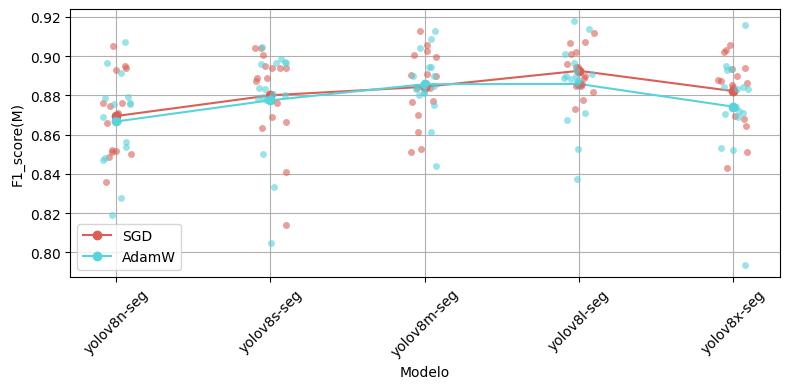

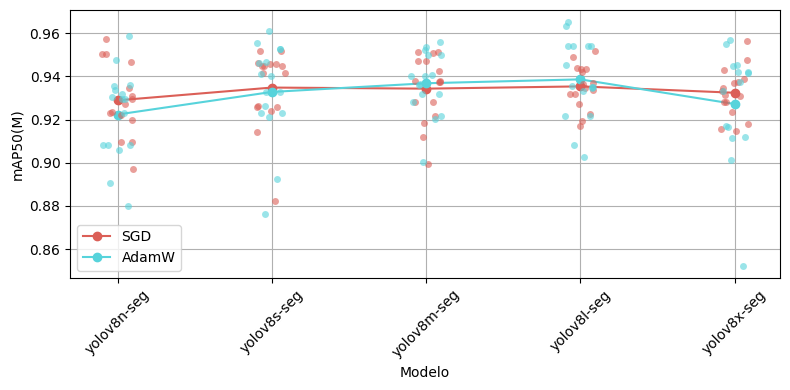

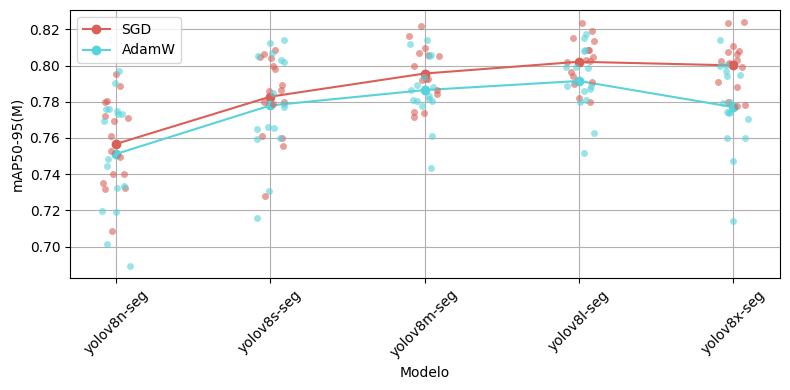

In [38]:
order = orden_yolov8
label = ["YOLOv8"]
plot_dict_yolov8_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolov8_opt_simple = [plot_metric(**plot_dict_yolov8_opt_simple[1]), plot_metric(**plot_dict_yolov8_opt_simple[3]), plot_metric(**plot_dict_yolov8_opt_simple[5])]

#### YOLOv9

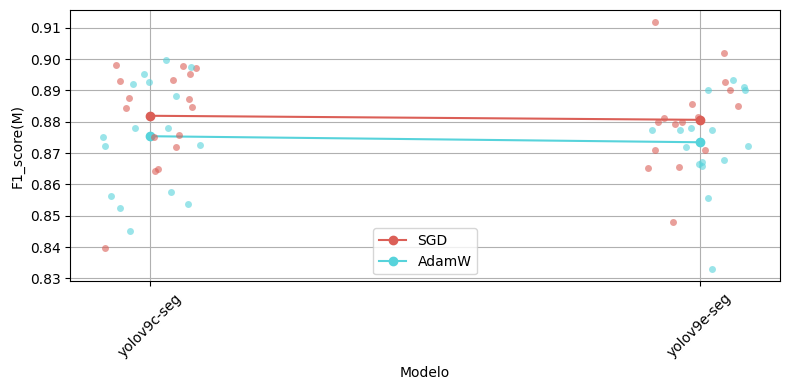

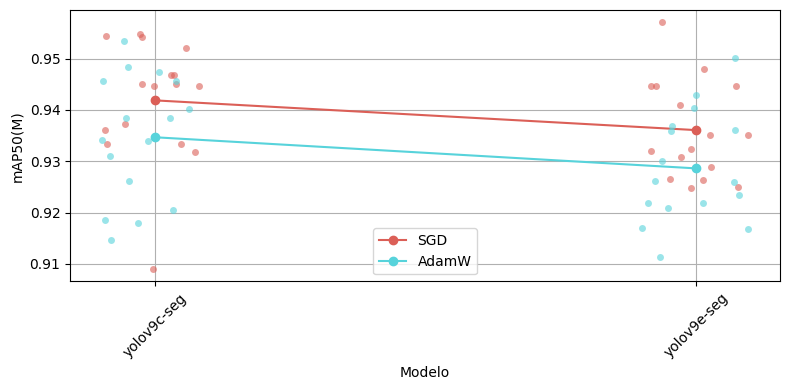

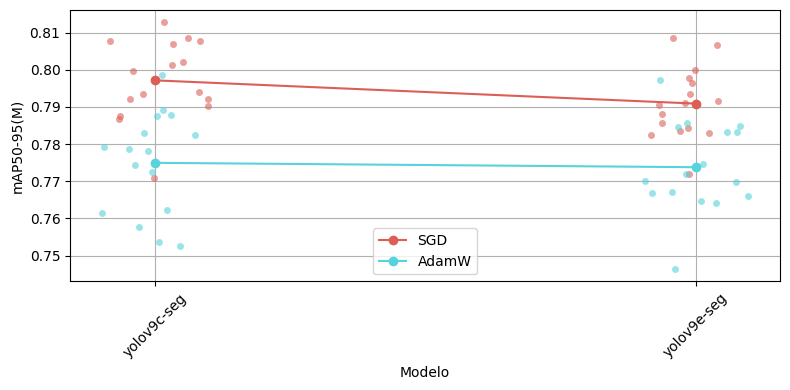

In [39]:
order = orden_yolov9
label = ["YOLOv9"]
plot_dict_yolov9_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolov9_opt_simple = [plot_metric(**plot_dict_yolov9_opt_simple[1]), plot_metric(**plot_dict_yolov9_opt_simple[3]), plot_metric(**plot_dict_yolov9_opt_simple[5])]

#### YOLOv11

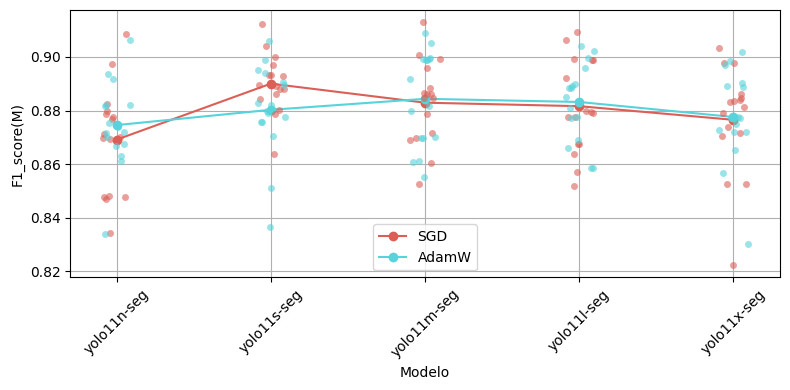

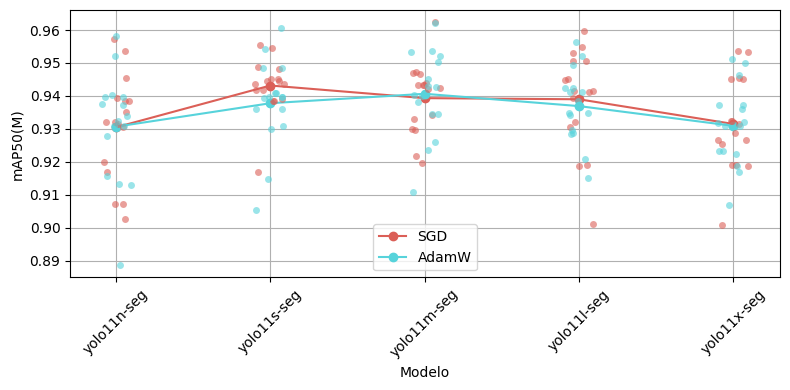

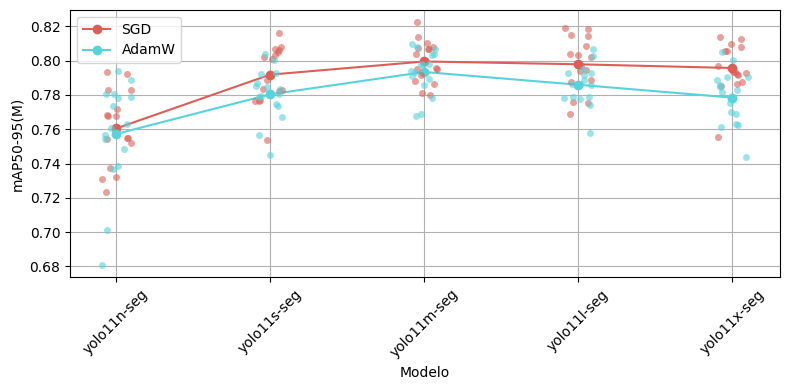

In [40]:
order = orden_yolo11
label = ["YOLOv11"]
plot_dict_yolo11_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolo11_opt_simple = [plot_metric(**plot_dict_yolo11_opt_simple[1]), plot_metric(**plot_dict_yolo11_opt_simple[3]), plot_metric(**plot_dict_yolo11_opt_simple[5])]

#### Todos juntos

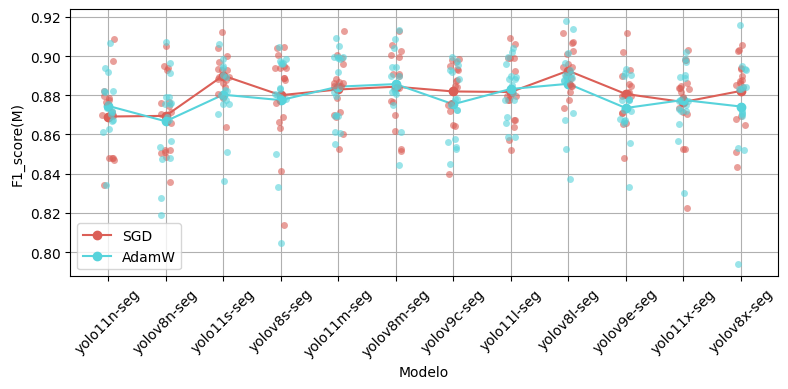

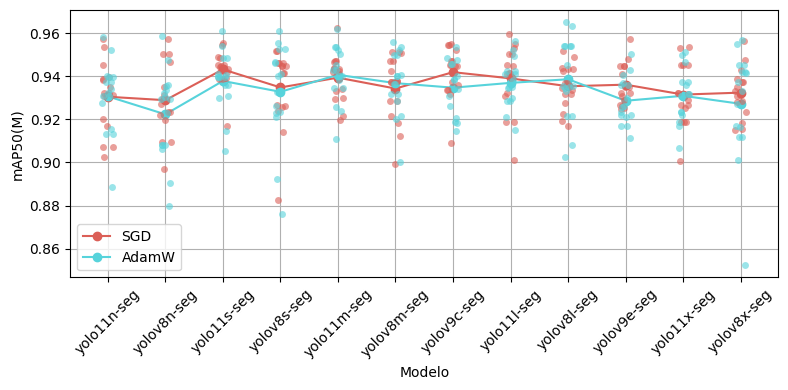

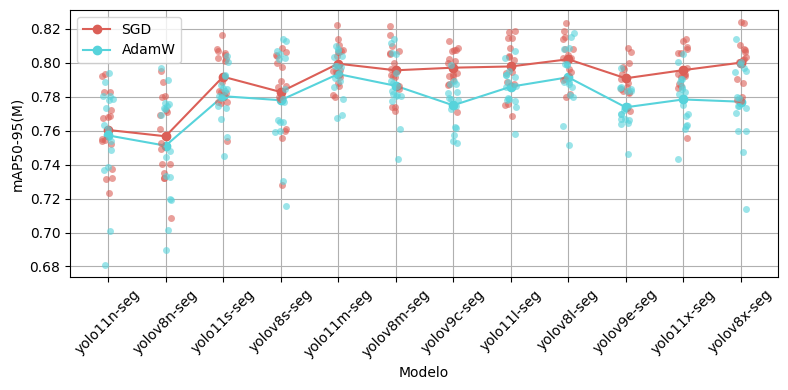

In [41]:
order = models_by_size
label = ["Promedio"]
plot_dict_yolo_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolo_opt_simple = [plot_metric(**plot_dict_yolo_opt_simple[1]), plot_metric(**plot_dict_yolo_opt_simple[3]), plot_metric(**plot_dict_yolo_opt_simple[5])]

### Con gráficos - Comparación factor de mejora

In [42]:
datagram = [mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==False]]
datagrams = [mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==False], mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==True]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Sin Outliers", "Con Outliers"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora entre SGD y AdamW."

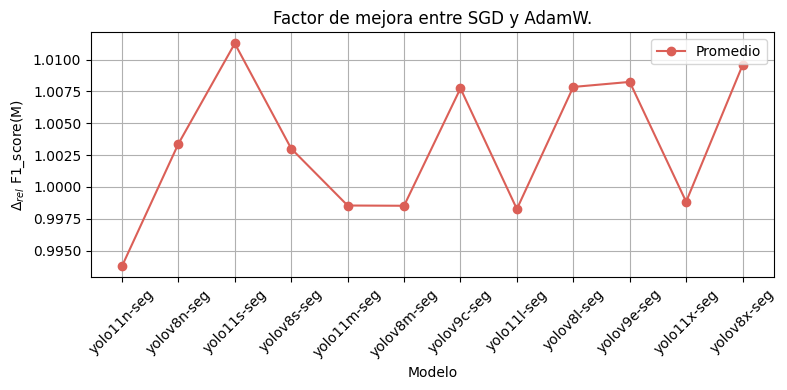

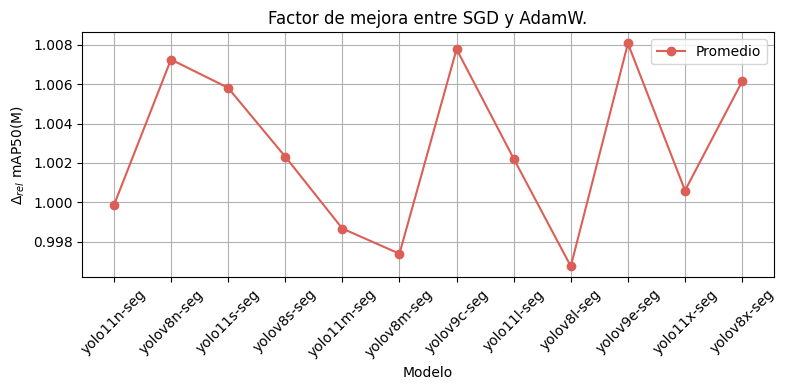

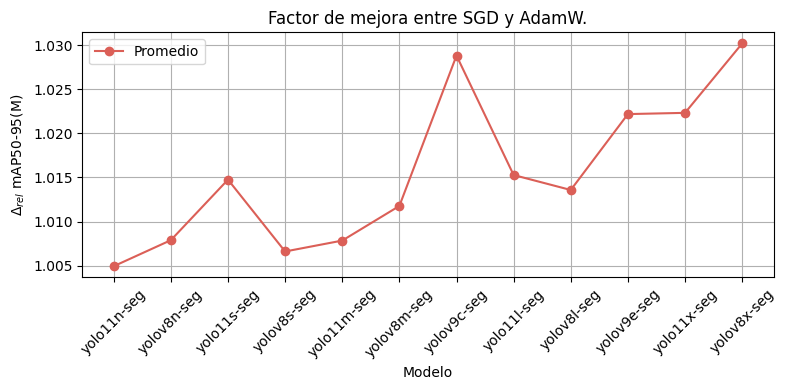

In [43]:
#TODO: Datos importantes!!!
order = models_by_size
label = ["Promedio"]
plot_dict_yolo11_opt_diffm = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)
figuras_yolo11_opt_diffm = [plot_metric(**plot_dict_yolo11_opt_diffm[0]), plot_metric(**plot_dict_yolo11_opt_diffm[2]), plot_metric(**plot_dict_yolo11_opt_diffm[4])]

## Conclusiones de comparación según optimizador:

1) SGD es ligeramente superior a AdamW.
2) La diferencia entre SGD y AdamW se hace mayor al realizar exportación en TensorRT con cuantización númerica.
3) Mientras más grande el modelo, mejor es SGD comparado con AdamW.
4) Para el dataset de Salmones no hubieron outliers con AdamW.

## Efecto de la exportación
Se vieron algunos efectos de la exportación antes, pero ahora se mostrarán los efectos más directos.

### Tablas comparativas

In [44]:
# Parametros para comparar
columnas_1 = "Model"
columnas_2 = "Format"
opciones_1 = model_by_version
opciones_2 = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
casos_a_comparar_1 = ["Pytorch", "TensorRT-F32"]
casos_a_comparar_2 = ["Pytorch", "TensorRT-F16"]
casos_a_comparar_3 = ["Pytorch", "TensorRT-INT8"]
casos_a_comparar_4 = [False, True]

# Comparar por Modelo
resultados_tt_1 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_tt_2 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_tt_3 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_tt_1, mean_diff_r_by_format_tt_1, mean_diff_m_by_format_tt_1, mean_diff_re_by_format_tt_1 = crear_datagramas_filtrados(resultados_tt_1, columnas_1, opciones_1)
mean_diff_by_format_tt_2, mean_diff_r_by_format_tt_2, mean_diff_m_by_format_tt_2, mean_diff_re_by_format_tt_2 = crear_datagramas_filtrados(resultados_tt_2, columnas_1, opciones_1)
mean_diff_by_format_tt_3, mean_diff_r_by_format_tt_3, mean_diff_m_by_format_tt_3, mean_diff_re_by_format_tt_3 = crear_datagramas_filtrados(resultados_tt_3, columnas_1, opciones_1)

# Comparar por Modelo (sin transfer learning)
resultados_fl_1 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_fl_2 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_fl_3 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_fl_1, mean_diff_r_by_format_fl_1, mean_diff_m_by_format_fl_1, mean_diff_re_by_format_fl_1 = crear_datagramas_filtrados(resultados_fl_1, columnas_1, opciones_1)
mean_diff_by_format_fl_2, mean_diff_r_by_format_fl_2, mean_diff_m_by_format_fl_2, mean_diff_re_by_format_fl_2 = crear_datagramas_filtrados(resultados_fl_2, columnas_1, opciones_1)
mean_diff_by_format_fl_3, mean_diff_r_by_format_fl_3, mean_diff_m_by_format_fl_3, mean_diff_re_by_format_fl_3 = crear_datagramas_filtrados(resultados_fl_3, columnas_1, opciones_1)

# Comparar por Modelo (con transfer learning)
resultados_tl_1 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_tl_2 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_tl_3 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_tl_1, mean_diff_r_by_format_tl_1, mean_diff_m_by_format_tl_1, mean_diff_re_by_format_tl_1 = crear_datagramas_filtrados(resultados_tl_1, columnas_1, opciones_1)
mean_diff_by_format_tl_2, mean_diff_r_by_format_tl_2, mean_diff_m_by_format_tl_2, mean_diff_re_by_format_tl_2 = crear_datagramas_filtrados(resultados_tl_2, columnas_1, opciones_1)
mean_diff_by_format_tl_3, mean_diff_r_by_format_tl_3, mean_diff_m_by_format_tl_3, mean_diff_re_by_format_tl_3 = crear_datagramas_filtrados(resultados_tl_3, columnas_1, opciones_1)

# Comparar por transfer learning
resultados_caso = comparar_metricas(datagrama=df_updated, columna="TransferLearning", casos_a_comparar=casos_a_comparar_4)
mean_diff_by_TL, mean_diff_r_by_TL, mean_diff_m_by_TL, mean_diff_re_by_TL = crear_datagramas_filtrados(resultados_caso, columnas_2, opciones_2)

In [45]:
print("Mejora relativa entre Pytorch y TensorRT")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_tt_1, mean_diff_m_by_format_tt_2, mean_diff_m_by_format_tt_3)

Mejora relativa entre Pytorch y TensorRT


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.980275  0.985921     0.983856  0.985236    0.466302   0.899806   
0     0.980396  0.985972     0.984756  0.985510    0.491082   0.332805   
0     0.957552  0.969573     0.963565  0.959410    0.490125   0.239950   

   postprocess         Format  
0     1.430198   TensorRT-F32  
0     1.520945   TensorRT-F16  
0     1.507712  TensorRT-INT8

In [46]:
print("Mejora relativa entre Pytorch y TensorRT (sin Transfer Learning)")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_fl_1, mean_diff_m_by_format_fl_2, mean_diff_m_by_format_fl_3)

Mejora relativa entre Pytorch y TensorRT (sin Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.977569  0.986308     0.983408  0.985274    0.461303   0.914739   
0     0.977476  0.986321     0.984292  0.985600    0.489494   0.340376   
0     0.957445  0.970413     0.966979  0.962617    0.484248   0.246239   

   postprocess         Format  
0     1.434253   TensorRT-F32  
0     1.529920   TensorRT-F16  
0     1.503547  TensorRT-INT8

In [47]:
print("Mejora relativa entre Pytorch y TensorRT (con Transfer Learning)")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_tl_1, mean_diff_m_by_format_tl_2, mean_diff_m_by_format_tl_3)

Mejora relativa entre Pytorch y TensorRT (con Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.982982  0.985533     0.984304  0.985199    0.471302   0.884872   
0     0.983317  0.985623     0.985219  0.985419    0.492670   0.325234   
0     0.957660  0.968733     0.960152  0.956202    0.496003   0.233661   

   postprocess         Format  
0     1.426142   TensorRT-F32  
0     1.511971   TensorRT-F16  
0     1.511877  TensorRT-INT8

### Con gráficos - Caso promedio

In [48]:
datagram_1 = [mean_diff_m_by_format_tt_1]
datagram_2 = [mean_diff_m_by_format_fl_1]
datagram_3 = [mean_diff_m_by_format_tl_1]
datagrams_1 = [mean_diff_m_by_format_tt_1[mean_diff_m_by_format_tt_1["Outlier"]==False],
               mean_diff_m_by_format_tt_2[mean_diff_m_by_format_tt_2["Outlier"]==False],
               mean_diff_m_by_format_tt_3[mean_diff_m_by_format_tt_3["Outlier"]==False]]
datagrams_2 = [mean_diff_m_by_format_fl_1,
               mean_diff_m_by_format_fl_2,
               mean_diff_m_by_format_fl_3]
datagrams_3 = [mean_diff_m_by_format_tl_1,
               mean_diff_m_by_format_tl_2,
               mean_diff_m_by_format_tl_3]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Float32", "Float16", "INT8"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]

order = models_by_size
label = ["Promedio"]
title_1 = "Factor de cambio entre Pytorch y TensorRT"
title_2 = "Factor de cambio entre Pytorch y TensorRT, sin Transfer Learning"
title_3 = "Factor de cambio entre Pytorch y TensorRT, con Transfer Learning"

plot_dict_yolo_format_ft_diffm = crear_lista_diccionarios(datagram_1, datagrams_1, group, groups, metrics, label, labels, order, xlabel, ylabel, title_1)
plot_dict_yolo_format_fl_diffm = crear_lista_diccionarios(datagram_2, datagrams_2, group, groups, metrics, label, labels, order, xlabel, ylabel, title_2)
plot_dict_yolo_format_tl_diffm = crear_lista_diccionarios(datagram_3, datagrams_3, group, groups, metrics, label, labels, order, xlabel, ylabel, title_3)

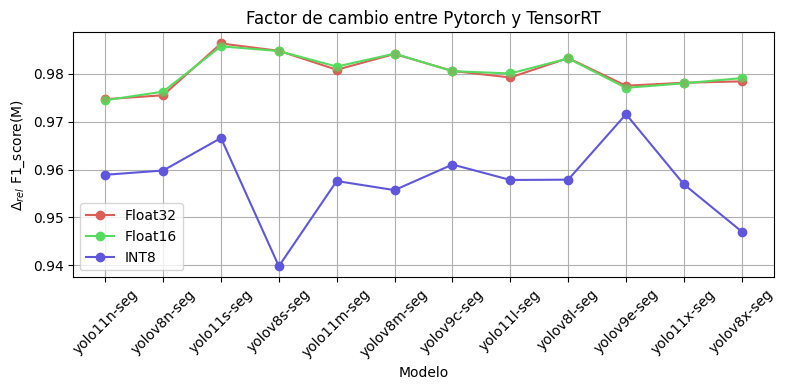

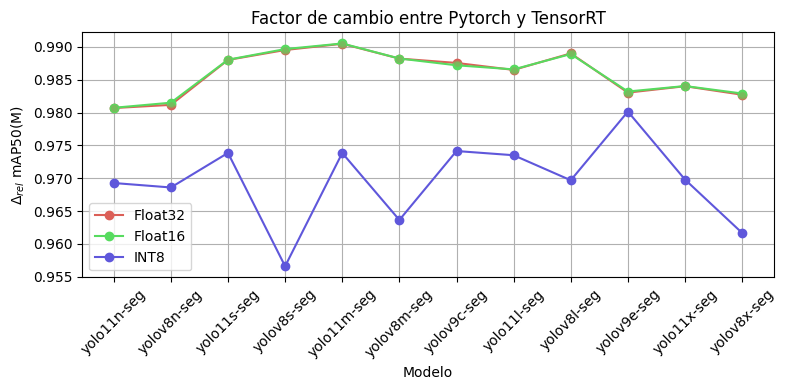

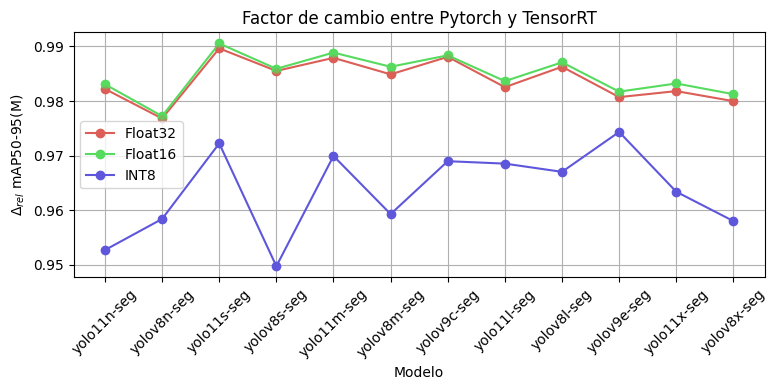

In [49]:
#TODO: Datos importantes!!!
figuras_yolo_format_ft_diffm = [plot_metric(**plot_dict_yolo_format_ft_diffm[1]), plot_metric(**plot_dict_yolo_format_ft_diffm[3]), plot_metric(**plot_dict_yolo_format_ft_diffm[5])]

### Con gráficos - Caso sin Transfer Learning

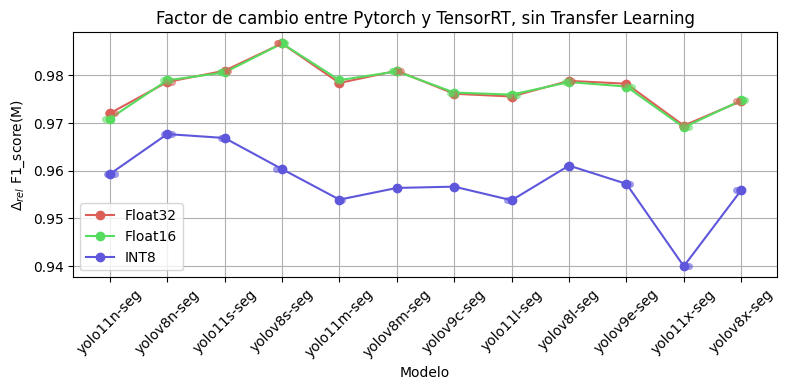

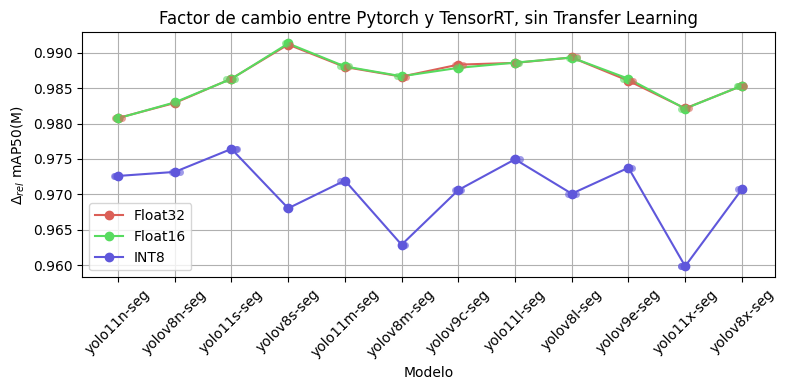

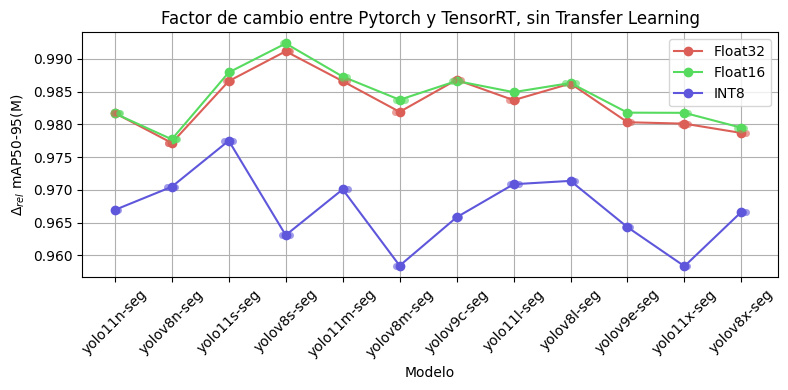

In [50]:
figuras_yolo_format_fl_diffm = [plot_metric(**plot_dict_yolo_format_fl_diffm[1]), plot_metric(**plot_dict_yolo_format_fl_diffm[3]), plot_metric(**plot_dict_yolo_format_fl_diffm[5])]

### Con gráficos - Caso con Transfer Learning

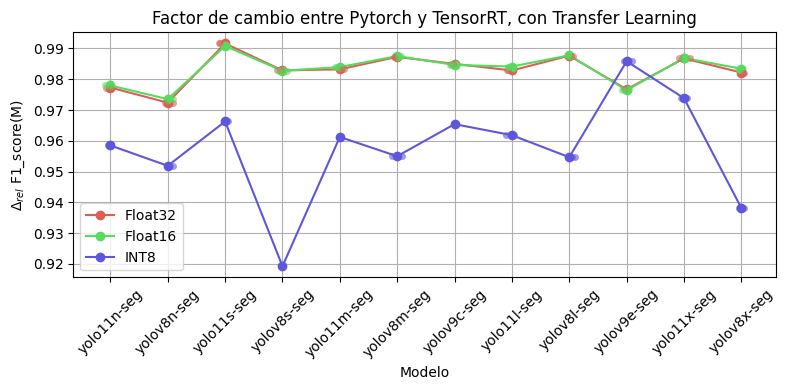

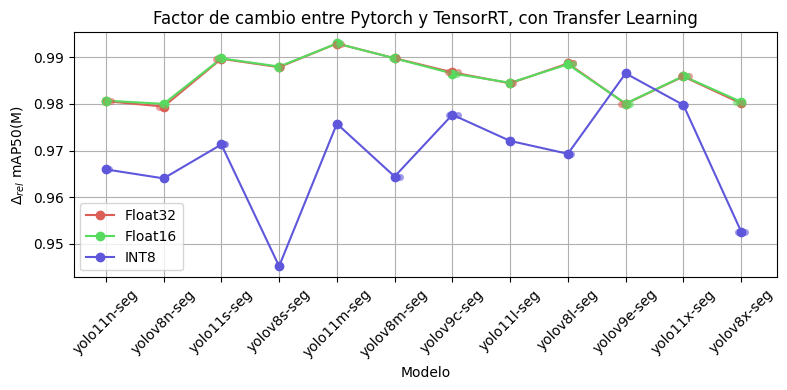

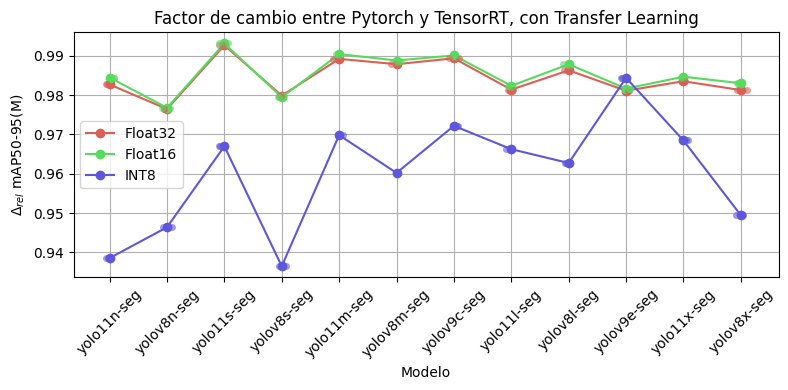

In [51]:
figuras_yolo_format_tl_diffm = [plot_metric(**plot_dict_yolo_format_tl_diffm[1]), plot_metric(**plot_dict_yolo_format_tl_diffm[3]), plot_metric(**plot_dict_yolo_format_tl_diffm[5])]

### Efecto del Transfer Learning al realizar cambio de formato a TensorRT

In [52]:
datagram = [mean_diff_m_by_TL]
datagrams = [mean_diff_m_by_TL, mean_diff_m_by_TL[mean_diff_m_by_TL["Outlier"]==False], mean_diff_m_by_TL[mean_diff_m_by_TL["Outlier"]==True]]

group = ["Format"]
groups = ["Format", "Format", "Format", "Format"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Promedio", "Sin outliers", " Con outliers"]
xlabel = "Formato de exportación"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora de usar Transfer Learning."

order = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
label = ["Promedio"]

plot_dict_yolo_TransferLearning_diffm = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

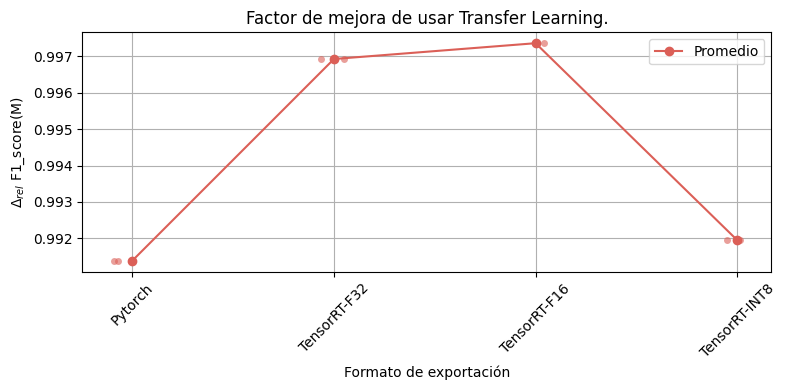

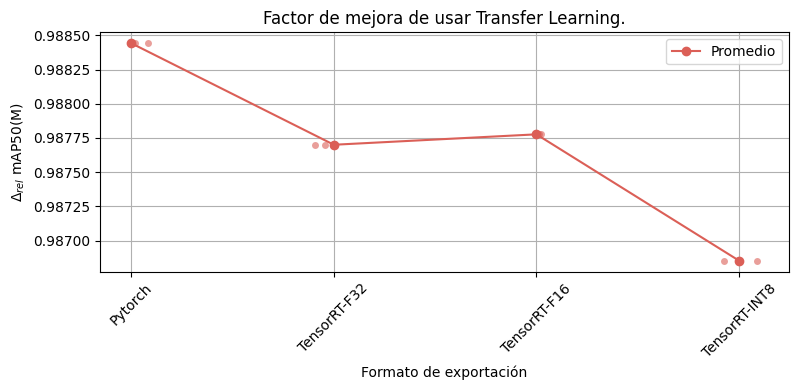

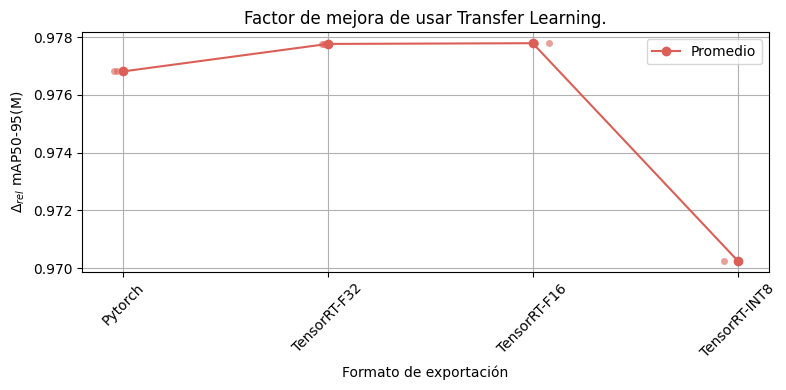

In [53]:
#TODO: Datos importantes!!!
# delta = transfer_learning / Normal
figuras_yolo_TransferLearning_diffm = [plot_metric(**plot_dict_yolo_TransferLearning_diffm[0]), plot_metric(**plot_dict_yolo_TransferLearning_diffm[2]), plot_metric(**plot_dict_yolo_TransferLearning_diffm[4])]

## Conclusiones sobre el efecto de la exportación:
1) Similar a como ocurre con Deepfish, el tamaño del modelo no parece afectar mucho a la caida de rendimiento que tendrá al exportarse a TensorRT-INT8. Esto es más cierto cuando se considera el no uso de transfer learning, en caso contrario pareciera haber un efecto de menor caída de rendimiento a modelos más grandes, o eso parece ser la tendecia, pero esto es más dependiente de modelos en particular que de el tamaño. Si parece ser que utilizando transfer learning YOLOv8 tiene peores caidas de rendimiento.
2) Se observa que el uso de transfer learning tiene un efecto negativo en la calidad del modelo al exportarse, siendo los entrenamientos sin transfer learning (sin congelar capas) los que mejores resultados dan (menor caida en rendimiento), por ende debiese preferirse el entrenamiento de esta forma.
3) La "mejora relativa" (o empeoramiento en este caso) de pasar a TensorRT en números flotante es más pronunciada con el dataset de Salmones (~0.98) que con Deepfish (~0.998), pero lo contrario ocurre con la exportación a TensorRT-INT8, donde Salmones tiene una mejora relativa de ~0.957 mientras que en Deepfish es de ~0.917.

## Comparar YOLOv8 con YOLOv11

### Tablas comparativas - Caso simple

In [54]:
# Comparación simple (sin diferencias)
df_yolov8 = df_updated.loc[df_updated["Model"].isin(orden_yolov8)].copy()
df_yolo11 = df_updated.loc[df_updated["Model"].isin(orden_yolo11)].copy()

# Reemplazar los valores en la columna "Model"
yolo_sizes = ["YOLOn", "YOLOs", "YOLOm", "YOLOl", "YOLOx"]
mapping_yolov8 = dict(zip(orden_yolov8, yolo_sizes))
mapping_yolo11 = dict(zip(orden_yolo11, yolo_sizes))
df_yolov8["Model"] = df_yolov8["Model"].replace(mapping_yolov8)
df_yolo11["Model"] = df_yolo11["Model"].replace(mapping_yolo11)

# Crear tablas comparativas
extra_conditions_1 = {"Format": ["Pytorch"], "TransferLearning": [False]}
extra_conditions_2 = {"Format": ["Pytorch"], "TransferLearning": [True]}
extra_conditions_3 = {"Format": ["TensorRT-INT8"], "TransferLearning": [False]}
extra_conditions_4 = {"Format": ["TensorRT-INT8"], "TransferLearning": [True]}
mean_yolov8_py_fl, mean_yolov9_py_fl, mean_yolo11_py_fl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_1)
mean_yolov8_py_tl, mean_yolov9_py_tl, mean_yolo11_py_tl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_2)
mean_yolov8_int8_fl, mean_yolov9_int8_fl, mean_yolo11_int8_fl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_3)
mean_yolov8_int8_tl, mean_yolov9_int8_tl, mean_yolo11_int8_tl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_4)

In [55]:
print("Resultados promedios y máximos por modelo. En formato Pytorch e ignorando Transfer Learning")
pd.concat([mean_yolov8_py_fl, pd.DataFrame([mean_yolov8_py_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_py_fl, pd.DataFrame([mean_yolo11_py_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato Pytorch e ignorando Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.906923          0.900401         0.006803   
1   yolov8s-seg         0.904645          0.902639         0.003624   
2   yolov8m-seg         0.913031          0.905590         0.005653   
3   yolov8l-seg         0.917785          0.909802         0.009542   
4   yolov8x-seg         0.915585          0.903382         0.009363   
5        YOLOv8         0.911594          0.904363         0.006997   
6   yolo11n-seg         0.908547          0.901546         0.007095   
7   yolo11s-seg         0.912406          0.901189         0.009658   
8   yolo11m-seg         0.912962          0.907021         0.005213   
9   yolo11l-seg         0.909410          0.902579         0.004769   
10  yolo11x-seg         0.903281          0.899151         0.002814   
11      YOLOv11         0.909321          0.902297         0.005910   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.958568       0.952569      0.006238         0.796959   
1       0.961117       0.955007      0.004430         0.814259   
2       0.955803       0.953042      0.002159         0.821668   
3       0.965056       0.957289      0.008132         0.823734   
4       0.956590       0.952746      0.006568         0.823967   
5       0.959427       0.954131      0.005505         0.816117   
6       0.958064       0.955252      0.002824         0.793862   
7       0.960752       0.954876      0.004974         0.816372   
8       0.962404       0.955827      0.007760         0.822413   
9       0.959748       0.955703      0.003237         0.818878   
10      0.953742       0.952013      0.001770         0.813957   
11      0.958942       0.954734      0.004113         0.813096   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.792723         0.003998  
1           0.809906         0.004467  
2           0.816002         0.004252  
3           0.818798         0.003648  
4           0.814612         0.012711  
5           0.810408         0.005815  
6           0.792070         0.002303  
7           0.807179         0.006865  
8           0.813525         0.006394  
9           0.809682         0.011307  
10          0.799787         0.017423  
11          0.804449         0.008858

In [56]:
print("Resultados promedios y máximos por modelo. En formato Pytorch y con Transfer Learning")
pd.concat([mean_yolov8_py_tl, pd.DataFrame([mean_yolov8_py_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_py_tl, pd.DataFrame([mean_yolo11_py_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato Pytorch y con Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.891356          0.875032         0.011025   
1   yolov8s-seg         0.900505          0.895597         0.005657   
2   yolov8m-seg         0.913015          0.898832         0.014339   
3   yolov8l-seg         0.907209          0.902860         0.005058   
4   yolov8x-seg         0.905467          0.896032         0.006642   
5        YOLOv8         0.903510          0.893671         0.008544   
6   yolo11n-seg         0.891807          0.883224         0.006293   
7   yolo11s-seg         0.905937          0.896786         0.006163   
8   yolo11m-seg         0.899136          0.896412         0.003346   
9   yolo11l-seg         0.906143          0.899603         0.006615   
10  yolo11x-seg         0.901818          0.894000         0.007164   
11      YOLOv11         0.900968          0.894005         0.005916   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.933756       0.930965      0.002845         0.752907   
1       0.945895       0.942963      0.002805         0.786428   
2       0.952219       0.946482      0.005807         0.799836   
3       0.945055       0.941488      0.004709         0.804640   
4       0.947410       0.941201      0.004466         0.810552   
5       0.944867       0.940620      0.004126         0.790873   
6       0.945335       0.938659      0.005219         0.767463   
7       0.954179       0.949946      0.002831         0.788413   
8       0.950250       0.945627      0.003182         0.806679   
9       0.953128       0.945568      0.006858         0.808651   
10      0.946505       0.939817      0.007269         0.812721   
11      0.949879       0.943923      0.005072         0.796786   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.748752         0.003449  
1           0.782071         0.004691  
2           0.794096         0.005605  
3           0.798889         0.007077  
4           0.795035         0.015216  
5           0.783769         0.007208  
6           0.757243         0.008575  
7           0.783921         0.003896  
8           0.800880         0.005324  
9           0.800349         0.006867  
10          0.803032         0.010190  
11          0.789085         0.006970

In [57]:
print("Resultados promedios y máximos por modelo. En formato TensorRT-INT8 e ignorando Transfer Learning")
pd.concat([mean_yolov8_int8_fl, pd.DataFrame([mean_yolov8_int8_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_int8_fl, pd.DataFrame([mean_yolo11_int8_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato TensorRT-INT8 e ignorando Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.875870          0.871308         0.004611   
1   yolov8s-seg         0.877911          0.866823         0.012815   
2   yolov8m-seg         0.880374          0.866106         0.011839   
3   yolov8l-seg         0.881481          0.874303         0.006384   
4   yolov8x-seg         0.884106          0.863426         0.019016   
5        YOLOv8         0.879948          0.868393         0.010933   
6   yolo11n-seg         0.877407          0.864862         0.012329   
7   yolo11s-seg         0.892694          0.871312         0.024299   
8   yolo11m-seg         0.878574          0.865200         0.008922   
9   yolo11l-seg         0.868986          0.860858         0.007260   
10  yolo11x-seg         0.871678          0.845207         0.022907   
11      YOLOv11         0.877868          0.861488         0.015144   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.934785       0.927010      0.006811         0.774843   
1       0.926446       0.924449      0.002501         0.789154   
2       0.928303       0.917664      0.012619         0.792799   
3       0.935005       0.928645      0.007114         0.802730   
4       0.933181       0.924806      0.007442         0.806338   
5       0.931544       0.924515      0.007297         0.793173   
6       0.939449       0.929084      0.009511         0.773567   
7       0.941947       0.932318      0.012791         0.804811   
8       0.938051       0.929000      0.012399         0.810298   
9       0.934341       0.931751      0.002012         0.803802   
10      0.925451       0.913770      0.011956         0.796760   
11      0.935848       0.927184      0.009734         0.797848   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.769317         0.006030  
1           0.779966         0.009916  
2           0.782050         0.008094  
3           0.795365         0.008343  
4           0.787405         0.016255  
5           0.782820         0.009728  
6           0.765882         0.008729  
7           0.789045         0.017473  
8           0.789185         0.017017  
9           0.786083         0.013085  
10          0.766471         0.022900  
11          0.779333         0.015841

In [58]:
print("Resultados promedios y máximos por modelo. En formato TensorRT-INT8 y con Transfer Learning")
pd.concat([mean_yolov8_int8_tl, pd.DataFrame([mean_yolov8_int8_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_int8_tl, pd.DataFrame([mean_yolo11_int8_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato TensorRT-INT8 y con Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.848658          0.832759         0.012666   
1   yolov8s-seg         0.841200          0.823302         0.016855   
2   yolov8m-seg         0.875042          0.858068         0.013363   
3   yolov8l-seg         0.884712          0.861997         0.021147   
4   yolov8x-seg         0.864626          0.840671         0.031814   
5        YOLOv8         0.862848          0.843359         0.019169   
6   yolo11n-seg         0.870193          0.846596         0.016976   
7   yolo11s-seg         0.880375          0.866459         0.012231   
8   yolo11m-seg         0.870116          0.861683         0.009103   
9   yolo11l-seg         0.879535          0.865261         0.010270   
10  yolo11x-seg         0.873703          0.870560         0.003860   
11      YOLOv11         0.874784          0.862112         0.010488   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.922178       0.897440      0.017963         0.735205   
1       0.914100       0.891302      0.016621         0.755404   
2       0.920090       0.912776      0.008924         0.773876   
3       0.922409       0.912584      0.008869         0.781869   
4       0.918152       0.896682      0.030414         0.779789   
5       0.919386       0.902157      0.016558         0.765229   
6       0.920085       0.906746      0.014173         0.737358   
7       0.938520       0.922658      0.014609         0.776962   
8       0.925924       0.922705      0.002743         0.781037   
9       0.939394       0.919180      0.015814         0.788510   
10      0.928832       0.920789      0.005425         0.793145   
11      0.930551       0.918416      0.010553         0.775403   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.708626         0.019375  
1           0.732425         0.016649  
2           0.762498         0.013969  
3           0.769112         0.014398  
4           0.754841         0.031061  
5           0.745500         0.019090  
6           0.710696         0.024937  
7           0.758012         0.013548  
8           0.776663         0.006236  
9           0.773306         0.013152  
10          0.777695         0.015122  
11          0.759275         0.014599

### Tablas comparativas - Por factor de mejora

In [59]:
# Parametros para comparar
columna = "Model"
opciones = [True, False]
casos_a_comparar_1 = ["yolov8n-seg", "yolo11n-seg"]
casos_a_comparar_2 = ["yolov8s-seg", "yolo11s-seg"]
casos_a_comparar_3 = ["yolov8m-seg", "yolo11m-seg"]
casos_a_comparar_4 = ["yolov8l-seg", "yolo11l-seg"]
casos_a_comparar_5 = ["yolov8x-seg", "yolo11x-seg"]

# Comparar por Modelo
resultados_yolon_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_1)
resultados_yolos_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_2)
resultados_yolom_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_3)
resultados_yolol_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_4)
resultados_yolox_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_5)

mean_diff_yolon_fl, mean_diff_r_yolon_fl, mean_diff_m_yolon_fl, mean_diff_re_yolon_fl = crear_datagramas_filtrados(resultados_yolon_fl, "TransferLearning", opciones)
mean_diff_yolos_fl, mean_diff_r_yolos_fl, mean_diff_m_yolos_fl, mean_diff_re_yolos_fl = crear_datagramas_filtrados(resultados_yolos_fl, "TransferLearning", opciones)
mean_diff_yolom_fl, mean_diff_r_yolom_fl, mean_diff_m_yolom_fl, mean_diff_re_yolom_fl = crear_datagramas_filtrados(resultados_yolom_fl, "TransferLearning", opciones)
mean_diff_yolol_fl, mean_diff_r_yolol_fl, mean_diff_m_yolol_fl, mean_diff_re_yolol_fl = crear_datagramas_filtrados(resultados_yolol_fl, "TransferLearning", opciones)
mean_diff_yolox_fl, mean_diff_r_yolox_fl, mean_diff_m_yolox_fl, mean_diff_re_yolox_fl = crear_datagramas_filtrados(resultados_yolox_fl, "TransferLearning", opciones)

# Juntar en tablas comparativas
comparison_yolov8_to_yolo11 = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, "Todos")
comparison_yolov8_to_yolo11_fl = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, False)
comparison_yolov8_to_yolo11_tl = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, True)

In [60]:
print("Mejora relativa entre YOLOv8 y YOLOv11")
comparison_yolov8_to_yolo11

Mejora relativa entre YOLOv8 y YOLOv11


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     1.004587  1.005487     1.006680  1.005918    0.994104   1.135097   
1     1.007808  1.007472     1.007802  1.009889    0.961330   1.001670   
2     0.998546  1.004846     1.006974  1.006844    0.994739   1.021466   
3     0.992478  1.001137     0.993942  0.995217    1.027989   0.832815   
4     0.999036  1.001792     0.998527  1.001061    0.989330   0.961346   

   postprocess  Model  
0     1.051737  YOLOn  
1     1.004289  YOLOs  
2     1.011310  YOLOm  
3     1.021476  YOLOl  
4     0.994069  YOLOx

In [61]:
print("Mejora relativa entre YOLOv8 y YOLOv11 (sin Transfer Learning)")
comparison_yolov8_to_yolo11_fl

Mejora relativa entre YOLOv8 y YOLOv11 (sin Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.995445  1.001639     1.000494  0.998749    0.995990   1.059935   
1     0.997069  0.999550     0.998156  0.999448    0.941600   1.001611   
2     0.999819  1.006014     1.002079  1.004906    0.973217   1.022385   
3     0.988751  0.999286     0.987740  0.990619    1.023973   0.833372   
4     0.988483  0.994849     0.980545  0.984806    0.990788   0.961423   

   postprocess  Model  
0     1.049603  YOLOn  
1     1.002713  YOLOs  
2     0.998981  YOLOm  
3     1.023747  YOLOl  
4     1.015182  YOLOx

In [62]:
print("Mejora relativa entre YOLOv8 y YOLOv11 (con Transfer Learning)")
comparison_yolov8_to_yolo11_tl

Mejora relativa entre YOLOv8 y YOLOv11 (con Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     1.013728  1.009334     1.012867  1.013086    0.992218   1.210259   
1     1.018548  1.015395     1.017448  1.020330    0.981059   1.001728   
2     0.997274  1.003678     1.011869  1.008783    1.016262   1.020547   
3     0.996206  1.002989     1.000144  0.999815    1.032005   0.832259   
4     1.009588  1.008734     1.016509  1.017315    0.987871   0.961269   

   postprocess  Model  
0     1.053872  YOLOn  
1     1.005865  YOLOs  
2     1.023639  YOLOm  
3     1.019206  YOLOl  
4     0.972957  YOLOx

### Con gráficos - Comparación simple

#### Todos los casos

In [63]:
datagrama_cualquiera = [df_yolov8]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["YOLOv8"]
labels = ["YOLOv8", "YOLOv11"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = yolo_sizes

title = "YOLOv8 vs YOLOv11"
datagramas_yolov8_yolo11 = [df_yolov8, df_yolo11]
plot_dict_yolo8vs11 = crear_lista_diccionarios(datagrama_cualquiera, datagramas_yolov8_yolo11, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

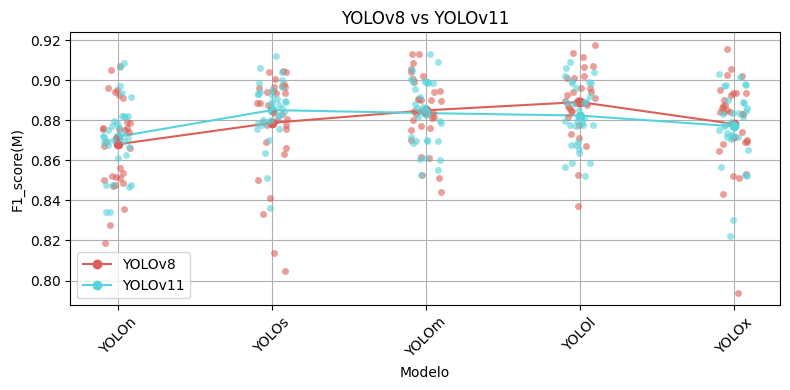

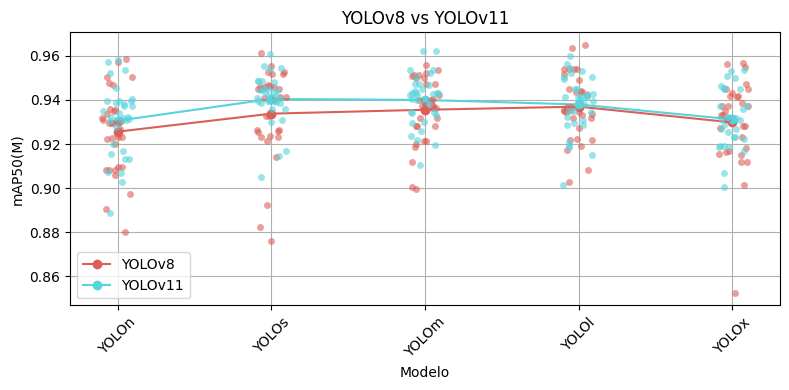

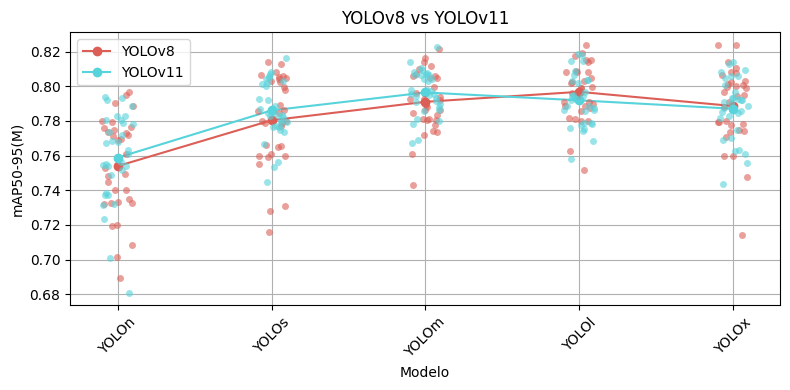

In [64]:
#TODO: Datos importantes!!!
figuras_yolov8vs11 = [plot_metric(**plot_dict_yolo8vs11[1]), plot_metric(**plot_dict_yolo8vs11[3]), plot_metric(**plot_dict_yolo8vs11[5])]

In [65]:
df_yolov8_to_show = df_yolov8.loc[(df_yolov8["TransferLearning"]==False) & (df_yolov8["Format"]=="TensorRT-INT8")]
df_yolo11_to_show = df_yolo11.loc[(df_yolo11["TransferLearning"]==False) & (df_yolo11["Format"]=="TensorRT-INT8")]

title = "YOLOv8 vs YOLOv11 (Sin Transfer Learning y con exportación INT8)"
datagramas_yolov8_yolo11 = [df_yolov8_to_show, df_yolo11_to_show]
plot_dict_yolo8vs11_fl = crear_lista_diccionarios(datagrama_cualquiera, datagramas_yolov8_yolo11, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

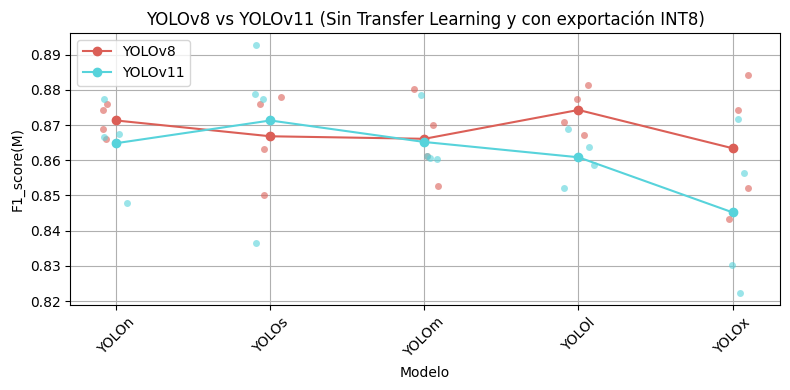

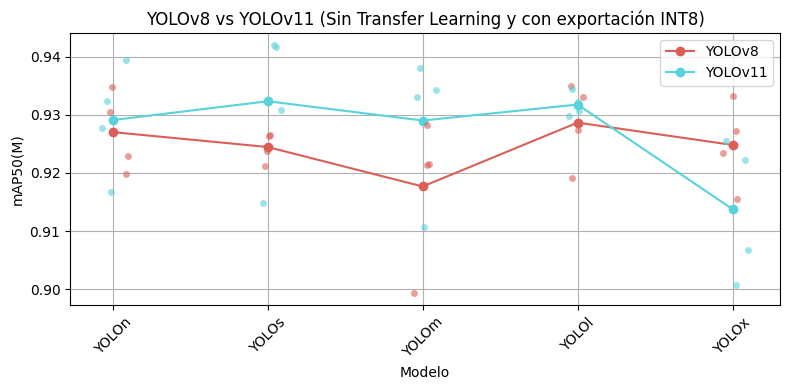

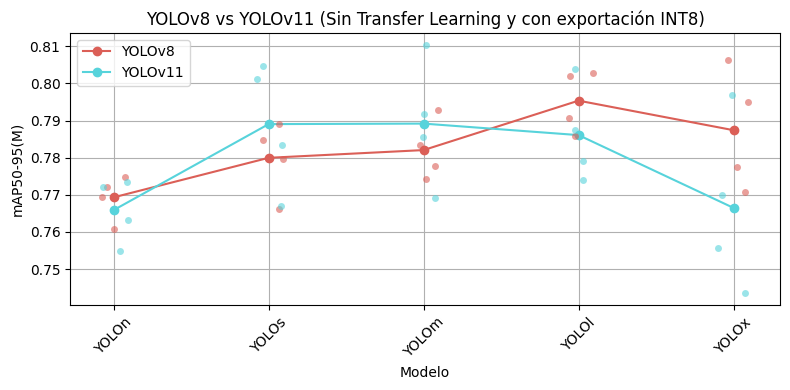

In [66]:
#TODO: Datos importantes!!!
figuras_yolov8vs11_fl = [plot_metric(**plot_dict_yolo8vs11_fl[1]), plot_metric(**plot_dict_yolo8vs11_fl[3]), plot_metric(**plot_dict_yolo8vs11_fl[5])]

### Con gráficos - Comparación factor de mejora

In [67]:
datagram_todos = [comparison_yolov8_to_yolo11]
datagramas_casos = [comparison_yolov8_to_yolo11, comparison_yolov8_to_yolo11_fl, comparison_yolov8_to_yolo11_tl]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio", "Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora de YOLOv8 a YOLOv11."
order = yolo_sizes

plot_dict_diff_yolo8vs11 = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

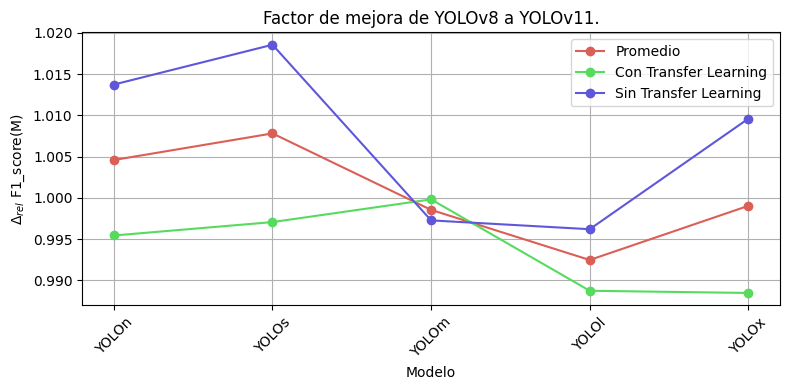

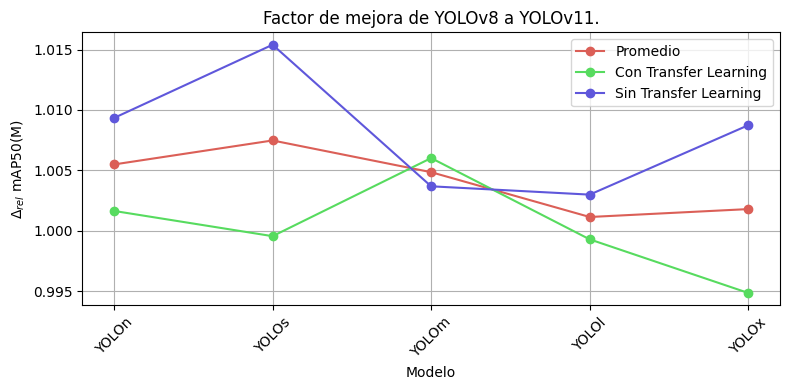

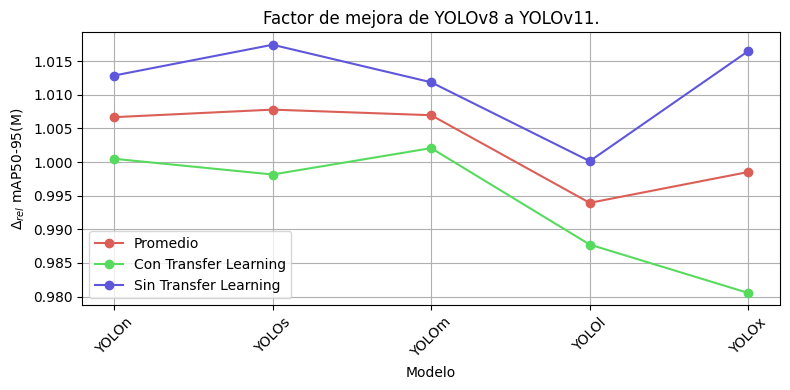

In [68]:
#TODO: Datos importantes!!!
# delta = (YOLOv11 - YOLOv8) / YOLOv11
figuras_diff_yolov8vs11 = [plot_metric(**plot_dict_diff_yolo8vs11[1]), plot_metric(**plot_dict_diff_yolo8vs11[3]), plot_metric(**plot_dict_diff_yolo8vs11[5])]

## Conclusiones de la comparación entre YOLOv8 y YOLOv11:
1. No hay una diferencia significativa entre YOLOv8 y YOLOv11, al menos no en promedio. Si parece ser que YOLOv8 rinde mejor con transfer learning, pero las diferencia es mínima.
2. Analizando el caso sin transfer learning y con exportación en TensorRT-INT8, no hay evidencia suficiente que sugiera que para este dataset una versión del modelo sea mejor que la otra.

## Comparación según Dataset (Labels Only vs con imagenes de fondo)

### Tablas comparativas - caso simple

In [69]:
# Crear tablas comparativas
extra_conditions_1 = {"Format": ["Pytorch"]}
extra_conditions_2 = {"Format": ["TensorRT-INT8"]}
datasets_mean_py = crear_tabla_promedios_dataset(df_updated, ["Salmones", "Salmones_LO"], extra_conditions_1)
datasets_mean_int8 = crear_tabla_promedios_dataset(df_updated, ["Salmones", "Salmones_LO"], extra_conditions_2)

In [70]:
# TODO: Datos Importantes!!
print("Resultados promedios y máximos según versión del Dataset.")
pd.concat([datasets_mean_py.assign(Format="Pytorch"), datasets_mean_int8.assign(Format="TensorRT-INT8")]).reset_index(drop=True)

Resultados promedios y máximos según versión del Dataset.


Dataset  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0     Salmones         0.917785          0.899715         0.010874   
1  Salmones_LO         0.913700          0.896203         0.008112   
2     Salmones         0.890037          0.857377         0.016382   
3  Salmones_LO         0.892694          0.862247         0.021101   

   mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0      0.963434       0.950548      0.007651         0.823596   
1      0.965056       0.945942      0.007946         0.823967   
2      0.941947       0.920473      0.012558         0.802030   
3      0.941722       0.918318      0.018015         0.810298   

   mAP50-95(M)_mean  mAP50-95(M)_std         Format  
0          0.797026         0.017749        Pytorch  
1          0.796490         0.018661        Pytorch  
2          0.765328         0.023635  TensorRT-INT8  
3          0.770344         0.028249  TensorRT-INT8

### Tablas comparativas - mejora relativa

In [71]:
# Parametros para comparar
columna = "Dataset"
casos_a_comparar = ["Salmones_LO", "Salmones"]
opciones_1 = [True, False]
opciones_2 = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
opciones_3 = models_by_size

# Comparar por Dataset
resultados_dataset = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar)
resultados_dataset_fl = comparar_metricas(datagrama=df_fl, columna=columna, casos_a_comparar=casos_a_comparar)
resultados_dataset_tl = comparar_metricas(datagrama=df_tl, columna=columna, casos_a_comparar=casos_a_comparar)

# Separar por diferentes casos
mean_diff_dataset_by_tl, mean_diff_r_dataset_by_tl, mean_diff_m_dataset_by_tl, mean_diff_re_dataset_by_tl = crear_datagramas_filtrados(resultados_dataset, "TransferLearning", opciones_1)
mean_diff_dataset_by_format, mean_diff_r_dataset_by_format, mean_diff_m_dataset_by_format, mean_diff_re_dataset_by_format = crear_datagramas_filtrados(resultados_dataset, "Format", opciones_2)
mean_diff_dataset_by_model, mean_diff_r_dataset_by_model, mean_diff_m_dataset_by_model, mean_diff_re_dataset_by_model = crear_datagramas_filtrados(resultados_dataset, "Model", opciones_3)


In [72]:
print("Mejora relativa del Dataset con imagenes de fondo, según uso de Transfer Learning.")
mean_diff_m_dataset_by_tl.loc[mean_diff_m_dataset_by_tl["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "TransferLearning"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según uso de Transfer Learning.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness TransferLearning
0     1.003875  1.007254     1.004632  1.004906             True
1     0.997272  1.001672     0.992875  0.993380            False
2     1.000573  1.004463     0.998753  0.999143            Todos

In [73]:
# TODO: Resultados Importantes
print("Mejora relativa del Dataset con imagenes de fondo, según formato de exportación.")
mean_diff_m_dataset_by_format.loc[mean_diff_m_dataset_by_format["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format
0     1.003955  1.004891     1.000767  1.000313        Pytorch
1     1.001766  1.005141     1.000223  1.000575   TensorRT-F32
2     1.001766  1.005208     1.000110  1.000426   TensorRT-F16
3     0.994806  1.002613     0.993914  0.995258  TensorRT-INT8
4     1.000573  1.004463     0.998753  0.999143          Todos

In [74]:
# TODO: Resultados Importantes
print("Mejora relativa del Dataset con imagenes de fondo, según el modelo.")
mean_diff_m_dataset_by_model.loc[mean_diff_m_dataset_by_model["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según el modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model
0      1.005496  1.006961     1.003863  1.004781  yolo11n-seg
1      1.003430  1.010441     1.011589  1.011940  yolov8n-seg
2      0.990748  0.995516     0.995070  0.993756  yolo11s-seg
3      1.007440  1.007474     1.003930  1.006214  yolov8s-seg
4      0.997610  1.009629     1.003682  1.004710  yolo11m-seg
5      1.008691  1.004680     1.003225  1.004146  yolov8m-seg
6      0.998423  1.001868     0.994404  0.995211  yolov9c-seg
7      1.006509  1.005648     0.997777  0.997051  yolo11l-seg
8      1.004114  1.004073     1.000431  0.997983  yolov8l-seg
9      0.988721  1.001341     0.992500  0.994456  yolov9e-seg
10     0.993250  0.999378     0.986374  0.987306  yolo11x-seg
11     1.002447  1.006548     0.992197  0.992162  yolov8x-seg
12     1.000573  1.004463     0.998753  0.999143        Todos

### Con gráficos - Comparación simple

In [75]:
datagram_todos = [df_updated]
datagramas_casos = [df_updated[df_updated["Dataset"]=="Salmones"], df_updated[df_updated["Dataset"]=="Salmones_LO"]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Con imagenes de fondo", "Sin imagenes de fondo"]
xlabel = "Modelo"
ylabel = [r"F1_score(M)", r"mAP50(M)", r"mAP50-95(M)"]
title = "Modelos entrenados con datasets con y sin imagenes de fondo"
order = models_by_size

plot_dict_datasets = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

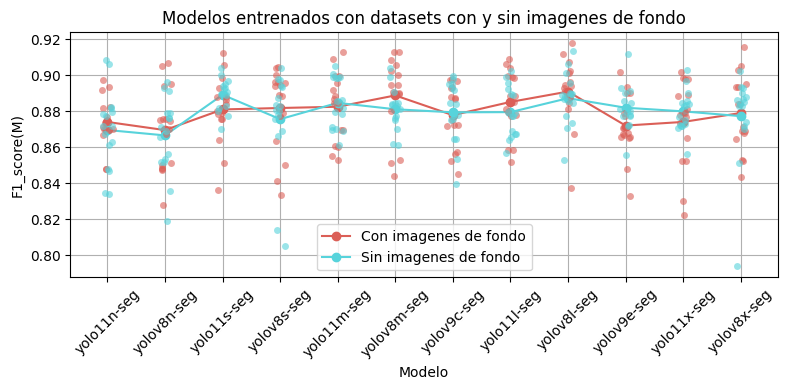

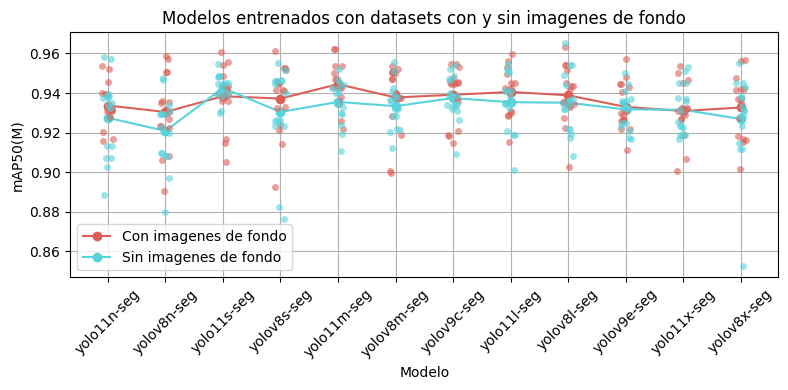

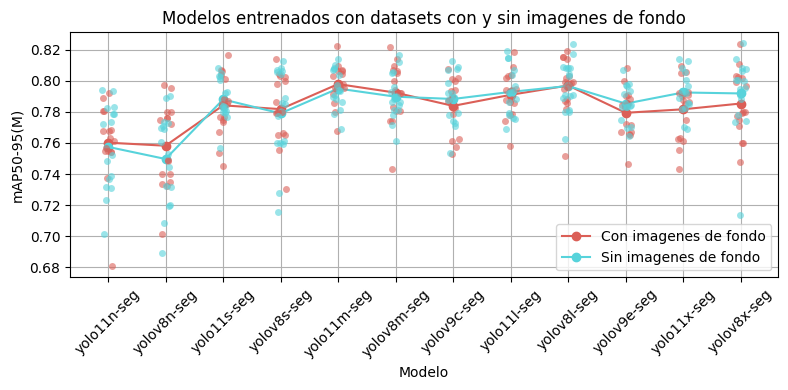

In [76]:
figuras_datasets = [plot_metric(**plot_dict_datasets[1]), plot_metric(**plot_dict_datasets[3]), plot_metric(**plot_dict_datasets[5])]

### Con gráficos - Comparación factor de mejora

In [77]:
datagram_todos = [mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==False]]
datagramas_casos = [mean_diff_m_dataset_by_model, mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==True], mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==False]]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio","Incluyendo Outliers", "Sin incluir Outliers"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora al añadir imagenes de fondo"
order = models_by_size

plot_dict_datasets_diff_model = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title, False)

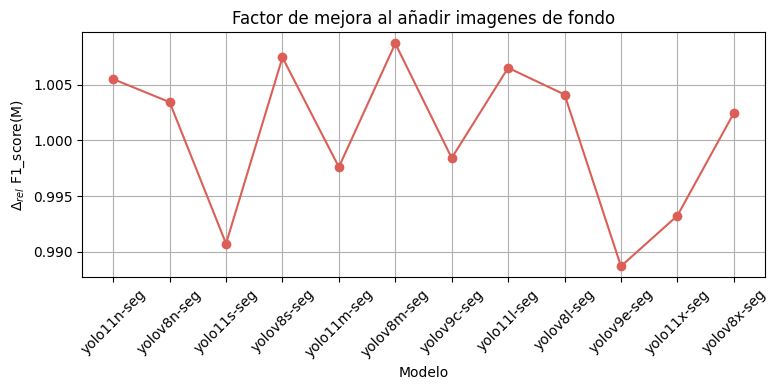

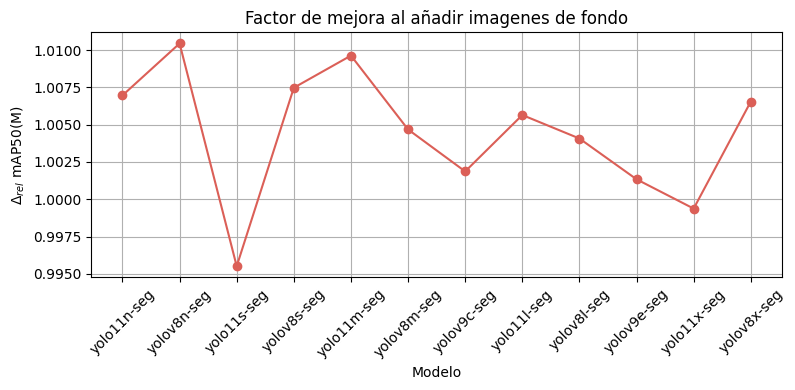

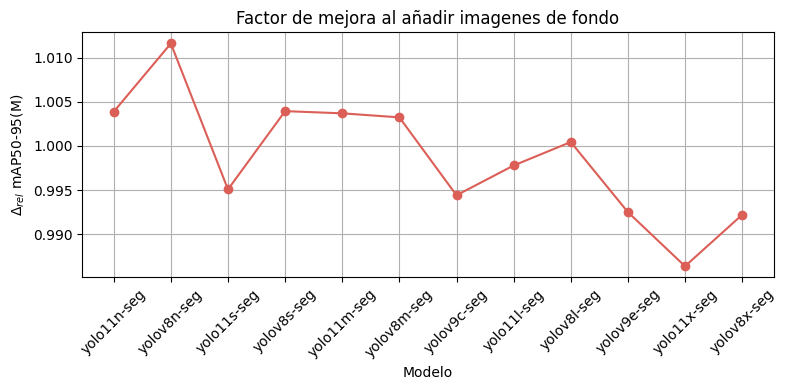

In [78]:
figuras_datasets_diff_model = [plot_metric(**plot_dict_datasets_diff_model[0]), plot_metric(**plot_dict_datasets_diff_model[2]), plot_metric(**plot_dict_datasets_diff_model[4])]

In [79]:
datagram_todos = [mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==False]]
datagramas_casos = [mean_diff_m_dataset_by_format, mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==True], mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==False]]
group = ["Format"]
groups = ["Format", "Format", "Format"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio","Incluyendo Outliers", "Sin incluir Outliers"]
xlabel = "Formato de Exportación"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora al añadir imagenes de fondo"
order = ["Pytorch", "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]

plot_dict_datasets_diff_format = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

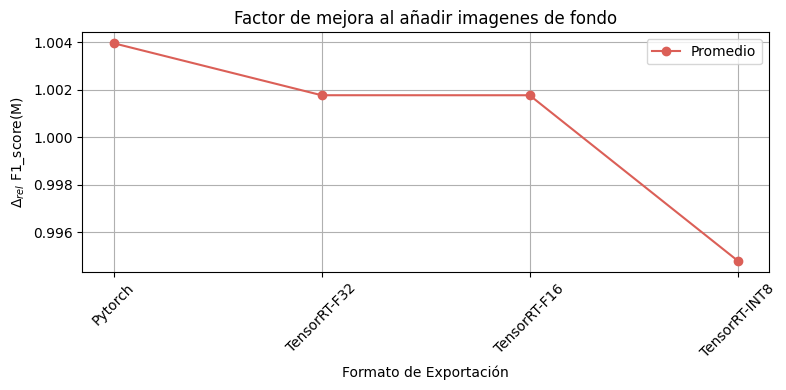

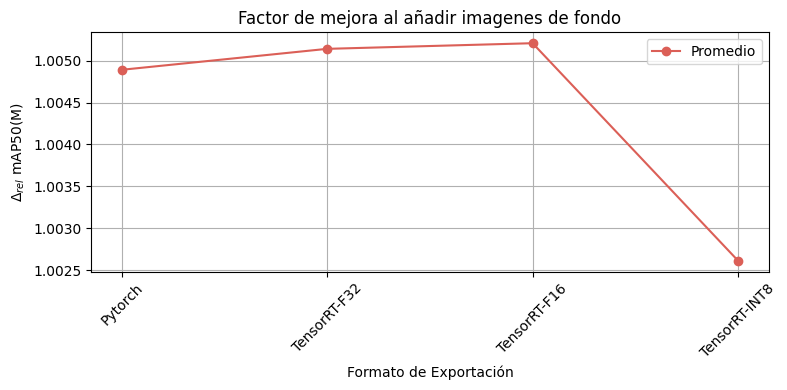

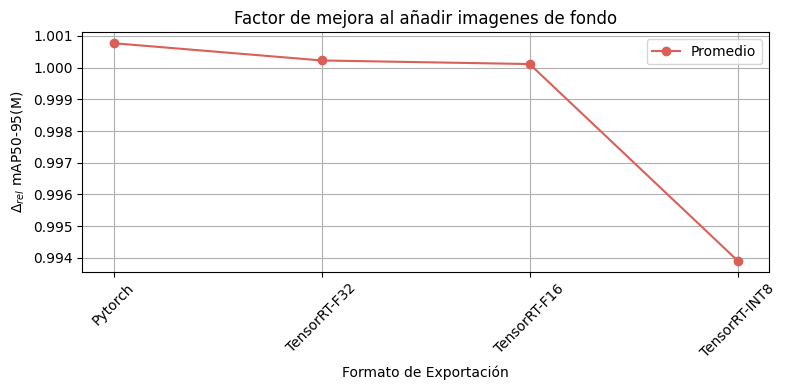

In [80]:
# TODO: IMPORTANTE!!
figuras_datasets_diff_format = [plot_metric(**plot_dict_datasets_diff_format[0]), plot_metric(**plot_dict_datasets_diff_format[2]), plot_metric(**plot_dict_datasets_diff_format[4])]

## Conclusiones sobre el tipo de Dataset:
1) A diferencia de lo visto con Deepfish y opuesto a lo que se esperaba, utilizar imagenes de fondo reduce la calidad del modelo entrenado, al menos en promedio.
2) En realidad en promedio es mejor usar iamgenes con fondo si no se realiza exportación, pero al realizar exportación con TensorRT-INT8 se vuelve ventajoso no usar imagenes de fondo.
2) La diferencia se hace incluso un poco mayor al realizar la exportación con TensorRT en INT8.

## Tiempo de inferencia.

In [81]:
datagram_sin_usar = [df_pytorch]
datagramas_tiempos = [df_pytorch, df_tensor32, df_tensor16, df_tensor8]
group = ["Model"]
groups = ["Model", "Model", "Model", "Model"]
metrics = ["inference", "total_time", "FPS", "FPS_total"]
xlabel = "Modelo"
ylabel = ["Tiempo de inferencia (ms)", "Tiempo total (ms)", "Frecuencia de inferencia (FPS)", "Frecuencia total (FPS)"]
order = models_by_size
label = ["Pytorch"]
labels = ["Pytorch", "Float32", "Float16", "INT8"]
title = "Velocidad del modelo"

plot_dict_datasets_time = crear_lista_diccionarios(datagram_sin_usar, datagramas_tiempos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

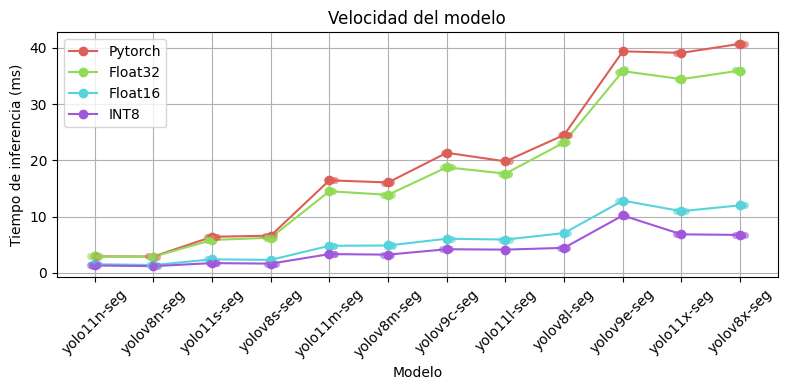

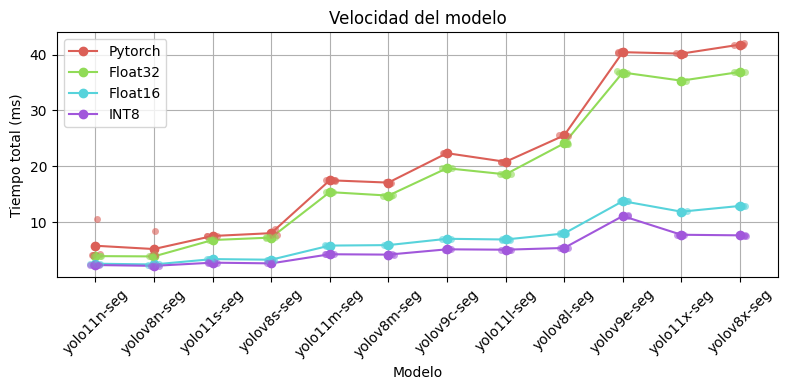

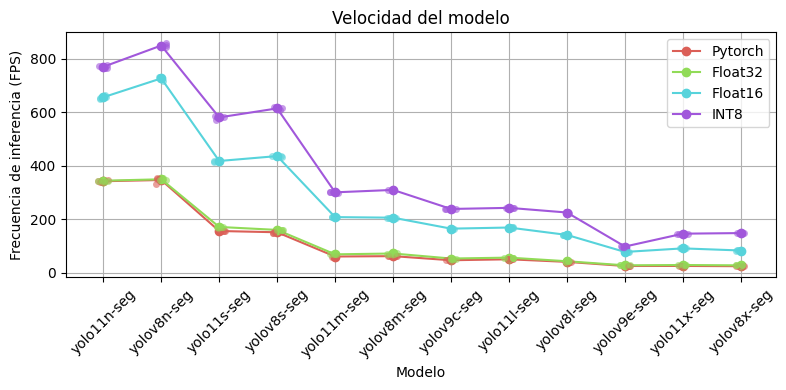

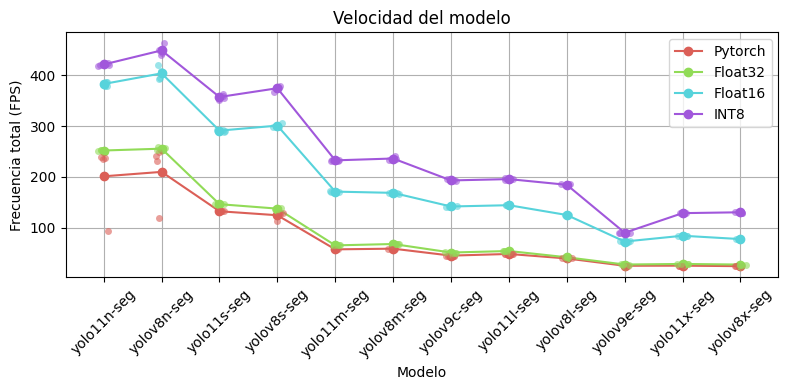

In [82]:
# TODO IMPORTANTE!!
figuras_datasets_time = [plot_metric(**plot_dict_datasets_time[1]), plot_metric(**plot_dict_datasets_time[3]),
                         plot_metric(**plot_dict_datasets_time[5]), plot_metric(**plot_dict_datasets_time[7])]

# Conclusiones finales

1) Transfer Learning (TL):
    - Entrenar por TL para este dataset implica una pequeña caida en el rendimiento, pero esto no es consistente a lo largo de todos los modelos.
    - Entrenar por TL implica una caida mayor en el rendimiento del modelo si se va a exportar con TensorRT-INT8, pero esto no se aplica en los modelos más grandes donde son iguales o incluso mejores los entrenamientos con TL y luego exportados con TensorRT-INT8.
2) Optimizador:
    - En promedio pero de forma consistente entrenar con SGD da mejores resultados que entrenar con AdamW, pero la diferencia es muy pequeña.
    - A diferencia del dataset Deepfish, con salmones no se generaron entrenamientos divergentes o fallidos con AdamW.
    - Igual que con Deepfish, los modelos entrenados con AdamW suelen tener una caida relativa mayor en su rendimiento al exportar con cuantización númerica INT8.
3) Efecto del tamaño del modelo (tamaño del archivo y número de parámetros):
    - Observando las métricas F1_Score y mAP50 indica que los modelos medianos son los que mejor rinden. No necesariamente los más grandes.
    - Para métricas más exigentes que las comunes, como lo es mAP50-95, un mayor tamaño de modelo si corresponde consistentemente con a un mejor rendimiento.
    - La caida de rendimiento al realizar cuantización númerica INT8 no parece ser muy afectada por el tamaño del modelo, solo si es muy pequeño (caso "n").
        - Lo que si parece afectar es el uso de transfer learning. Com se explicó arriba, donde es mejor usarlo si se entrenan modelos grandes.
4) Comparación entre versiones de modelos:
    - Se observó que no hay diferencia significativa entre usar YOLOv8 o YOLOv11.
5) Datasets:
    - Los modelos entrenados con un Dataset que incluye imagenes de fondo (caso normal) muestra un poco mejor rendimiento que el entrenado solo con imagenes con instancias etiquetadas (Labels Only).
    - Al realizar exportación con TensorRT-INT8 los modelos entrenados solo con imagenes etiquetadas (LO) superan a los entrenados con el dataset completo.
        - Esta diferencia puede explicarse por el hecho de que, durante la cuantización numérica aplicada en la exportación a INT8, únicamente la información latente más relevante o "fuertemente aprendida" en los pesos del modelo se conserva. Por otro lado, cuando se entrenan modelos utilizando imágenes de fondo, la representación interna que se aprende puede resultar más diluida, puesto que en cada época el entrenamiento se basa en un mayor número de imágenes, lo que reduce la influencia individual de cada imagen. Dicho efecto se vuelve evidente al optimizar el modelo, ya que este proceso obliga a una mayor simplificación de la representación interna.
        - Esto puede motivar a la remoción de imagenes de fondo, pero aún así considero que muchas de estas imagenes contienen información relevante para la identificación correcta de salmones, como información de cosas que son salmones pero no de interes (lejanos, borrosos, ocluidos), por ende me encuentro dubitativo de eliminar las imagenes de fondo del todo.
6) Otras cosas:
    - Se observó que el tiempo de inferencia es más corto con INT8, pero con exportación en FLOAT16 también se logra una reducción enorme en tiempo de inferencia con casi nula caida del rendimiento en la tarea de segmentación de instancias. Quizás sea más propicio realizar la búsqueda de hiperparámetros pensando en que el formato final será FLOAT16 y no INT8, ya que las consideraciones serían distintas.

## Resolución
Los modelos de tamaño M y L tienen casi la misma calidad de inferencia que los de tamaño X, pero con cerca de la mitad del tiempo de inferencia. Es más, los modelos M y L con exportación TensorRT-F16 tienen casi el mismo tiempo de inferencia que los modelos X con TensorRT-INT8, pero con mejor rendimiento. Por lo tanto no es un incentivo grande el entrenar modelos de tamaño X. Lo mismo aplica para YOLOv9, los modelos C son igual de buenos que los E, pero con la mitad del tiempo de inferencia.

Debido a que se usaran los modelos M, L y C, para estos casos es preferible hacer entrenamiento sin TransferLearning. También el uso del dataset completo.

Realizar busqueda de hiperparámetros para modelos YOLOv8 y YOLOv11 (m, l) y YOLOv9c; dataset normal; optimizador SGD; sin transfer learning.

In [83]:
resultado = df_updated[(df_updated['Format'].isin(['TensorRT-F16']))].sort_values(by='mAP50-95(M)', ascending=False)
columnas_deseadas = ['F1_score(M)', 'mAP50(M)', 'mAP50-95(M)', 'Model', 'Dataset', 'Optimizer', 'Format', 'TransferLearning', 'inference']
resultado[columnas_deseadas].head(5)

F1_score(M)  mAP50(M)  mAP50-95(M)        Model      Dataset Optimizer  \
26      0.894319  0.943515     0.815102  yolov8l-seg     Salmones       SGD   
178     0.879750  0.950511     0.814833  yolo11l-seg  Salmones_LO       SGD   
18      0.890042  0.937438     0.809799  yolov8m-seg     Salmones       SGD   
122     0.885973  0.936754     0.808331  yolov8l-seg  Salmones_LO       SGD   
130     0.885251  0.931168     0.808257  yolov8x-seg  Salmones_LO       SGD   

           Format  TransferLearning  inference  
26   TensorRT-F16             False   7.046825  
178  TensorRT-F16             False   5.902605  
18   TensorRT-F16             False   4.857294  
122  TensorRT-F16             False   7.082630  
130  TensorRT-F16             False  11.986269

In [84]:
resultado = df_updated[(df_updated['Format'].isin(['TensorRT-INT8']))].sort_values(by='mAP50-95(M)', ascending=False)
columnas_deseadas = ['F1_score(M)', 'mAP50(M)', 'mAP50-95(M)', 'Model', 'Dataset', 'Optimizer', 'Format', 'TransferLearning', 'inference']
resultado[columnas_deseadas].head(5)

F1_score(M)  mAP50(M)  mAP50-95(M)        Model      Dataset Optimizer  \
171     0.878574  0.933001     0.810298  yolo11m-seg  Salmones_LO       SGD   
131     0.884106  0.923348     0.806338  yolov8x-seg  Salmones_LO       SGD   
163     0.892694  0.941722     0.804811  yolo11s-seg  Salmones_LO       SGD   
179     0.863811  0.932233     0.803802  yolo11l-seg  Salmones_LO       SGD   
123     0.877499  0.919151     0.802730  yolov8l-seg  Salmones_LO       SGD   

            Format  TransferLearning  inference  
171  TensorRT-INT8             False   3.312737  
131  TensorRT-INT8             False   6.708572  
163  TensorRT-INT8             False   1.720783  
179  TensorRT-INT8             False   4.145784  
123  TensorRT-INT8             False   4.424375

# Mejores resultados finales

In [85]:
import os
import json
import numpy as np
import pandas as pd


def read_json(json_file) -> dict:
    with open(json_file, "r") as f:
        dictionary = json.load(f)
    return dictionary

def read_csv(csv_file):
    dataframe = pd.read_csv(csv_file)
    return dataframe

# Función para calcular el F1-score
def calculate_f1_score(precision, recall):
    # Evitar división por cero
    return np.where((precision + recall) > 0, 2 * (precision * recall) / (precision + recall), 0)

def combinar_datagramas(training_dfs: dict[str, pd.DataFrame]):
    # Crear una lista para almacenar los DataFrames con MultiIndex
    dfs = []
    for training_id, df in training_dfs.items():
        # Añadir el identificador del entrenamiento como columna temporal
        df = df.copy()
        df['tune_id'] = training_id
        # Establecer un MultiIndex con 'tune_id' y 'epoch'
        df = df.set_index(['tune_id', 'epoch'], drop=False)
        dfs.append(df)

    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(dfs)
    combined_df = combined_df.rename(columns=lambda x: x.replace('metrics/', '') if 'metrics/' in x else x)

    # Renombrar el índice de épocas
    combined_df.index.names = ['tune_id', 'epoch']
    
    # Añadir F1_score
    combined_df['F1_score(B)'] = calculate_f1_score(combined_df['precision(B)'], combined_df['recall(B)'])
    combined_df['F1_score(M)'] = calculate_f1_score(combined_df['precision(M)'], combined_df['recall(M)'])

    # Reordenar las columnas para colocar F1_score entre recall y mAP50
    # Obtener la lista de columnas
    columns = combined_df.columns.tolist()

    # Encontrar las posiciones de las columnas relevantes
    pos_recall_B = columns.index('recall(B)')
    pos_recall_M = columns.index('recall(M)')

    # Extraer las columnas F1_score recién creadas
    f1_b = combined_df.pop('F1_score(B)')
    f1_m = combined_df.pop('F1_score(M)')

    # Insertar las columnas en las posiciones deseadas
    combined_df.insert(pos_recall_B + 1, 'F1_score(B)', f1_b)
    combined_df.insert(pos_recall_M + 1, 'F1_score(M)', f1_m)

    return combined_df

def return_best_tune(tunes_result: dict[str, pd.DataFrame], metrica: str) -> pd.DataFrame:
    best_cases = {}

    for tune, tunes_df in tunes_result.items():
        last_epochs_list = []
        best_epochs_list = []
        for tune_id in tunes_df["tune_id"].unique().tolist():
            last_epoch_idx = tunes_df.loc[tunes_df["tune_id"] == tune_id]["epoch"].idxmax()
            best_epoch_idx = tunes_df.loc[tunes_df["tune_id"] == tune_id][metrica].idxmax()
            last_epochs_list.append(last_epoch_idx)
            best_epochs_list.append(best_epoch_idx)
        
        last_epoch_tunes = tunes_df.loc[last_epochs_list]
        best_epoch_tunes = tunes_df.loc[best_epochs_list]

        max_index_last = last_epoch_tunes[metrica].idxmax()
        max_index_best = best_epoch_tunes[metrica].idxmax()

        # Obtener los detalles de los casos con el mayor valor
        max_row_last = tunes_df.loc[max_index_last, ["precision(M)", "recall(M)", "F1_score(M)", "mAP50(M)", "mAP50-95(M)", "epoch", "trial_id", "model"]]
        max_row_best = tunes_df.loc[max_index_best, ["precision(M)", "recall(M)", "F1_score(M)", "mAP50(M)", "mAP50-95(M)", "epoch", "trial_id", "model"]]

        # Crear un DataFrame con las filas como columnas, diferenciando last y best
        combined_df = pd.DataFrame({
            f'{tune}_last': max_row_last,
            f'{tune}_best': max_row_best
        })

        best_cases[tune] = combined_df

    # Combinar todos los DataFrames en uno solo
    best_cases_df = pd.concat(best_cases.values(), axis=1)

    # Ordenar las columnas por tune si es necesario
    #best_cases_df = best_cases_df[[col for col in sorted(best_cases_df.columns)]]
    
    return best_cases_df

def return_best_train(model_pairs, df, metrica):
    best_cases = pd.DataFrame()

    for model_pair in model_pairs:
        df_filtered = df.loc[df["Model"].isin(model_pair)]
        max_index = df_filtered[metrica].idxmax()
        # Obtener los detalles del caso con el mayor valor
        max_row = df_filtered.loc[max_index, ["precision(M)", "recall(M)", "F1_score(M)", "mAP50(M)", "mAP50-95(M)", "Model"]]
        best_cases[model_pair[0]] = max_row
    
    #best_cases = best_cases[sorted(best_cases.columns)]
    return best_cases

## Mejores resultados pre-tuning

In [86]:
model_pairs = [["yolov8m-seg", "yolov8m-seg*"], ["yolov8l-seg", "yolov8l-seg*"],
               ["yolov9c-seg", "yolov9c-seg*"], ["yolo11m-seg", "yolo11m-seg*"],
               ["yolo11l-seg", "yolo11l-seg*"]]

results_path_1 = "training/results_4.csv"
results_path_2 = "training/results_5.csv"

# Read both CSV files
df1 = pd.read_csv(results_path_1)   # Sin transfer Learning
df2 = pd.read_csv(results_path_2)   # Con transfer Learning

# Concatenate them into a single DataFrame
df = pd.concat([df1, df2], ignore_index=True)

best_f1score_train = return_best_train(model_pairs, df, "F1_score(M)")
best_map5095_train = return_best_train(model_pairs, df, "mAP50-95(M)")

In [87]:
best_f1score_train

yolov8m-seg  yolov8l-seg   yolov9c-seg  yolo11m-seg  yolo11l-seg
precision(M)     0.919445     0.922057      0.902185     0.936932      0.92444
recall(M)        0.906706     0.913551      0.897196     0.890187      0.89486
F1_score(M)      0.913031     0.917785      0.899684     0.912962      0.90941
mAP50(M)         0.953718     0.963434      0.940159     0.962404     0.959748
mAP50-95(M)      0.814023     0.815138      0.779273     0.822413     0.818197
Model         yolov8m-seg  yolov8l-seg  yolov9c-seg*  yolo11m-seg  yolo11l-seg

In [88]:
best_map5095_train

yolov8m-seg  yolov8l-seg  yolov9c-seg  yolo11m-seg  yolo11l-seg
precision(M)     0.951026     0.899501     0.907966     0.936932     0.875911
recall(M)        0.864486     0.892523      0.88785     0.890187     0.923575
F1_score(M)      0.905693     0.895999     0.897795     0.912962     0.899112
mAP50(M)         0.951354     0.949007     0.952125     0.962404     0.954711
mAP50-95(M)      0.821668     0.823734     0.812739     0.822413     0.818878
Model         yolov8m-seg  yolov8l-seg  yolov9c-seg  yolo11m-seg  yolo11l-seg

## Mejores resultados post-tunning-1

In [89]:
# tune: model
casos_tune = {"tune7": "yolov8m", "tune8": "yolov8l", "tune9": "yolov9c", "tune10": "yolo11m", "tune11": "yolo11l"}
modelos_deseados = ["yolov8l", "yolov8m", "yolov9c", "yolo11m", "yolo11l"]

tunes_path = "runs/detect"
tunes_result = {}

# Recorrer los distintos archivos tune
for tune in os.listdir(tunes_path):
    tune_path = os.path.join(tunes_path, tune)
    # Entrar en la carpeta tune con fecha
    for date in os.listdir(tune_path):
        tune_full_path = os.path.join(tune_path, date)
        # Crear un diccionario donde guardar los dataframes de cada entrenamiento
        training_dfs = {}

        # Recorrer todos los tune dentro de la carpeta
        for train in os.listdir(tune_full_path):
            train_path = os.path.join(tune_full_path, train)

            # Ignorar los archivos y solo revisar las carpetas
            if os.path.isdir(train_path):
                tune_id = "_".join(train.split("_")[2:4])
                result_path = os.path.join(train_path, "progress.csv")
                dataframe = read_csv(result_path)
                training_dfs[tune_id] = dataframe

        # Combinar los datagramas del diccionario en uno solo
        combined_df = combinar_datagramas(training_dfs)
        if tune in casos_tune.keys():
            combined_df["model"] = casos_tune[tune]
        else:
            combined_df["model"] = "Unknown"

    # Añadir el datagrama combinado al diccionario de tunes.
    tunes_result[tune] = combined_df

best_f1score_tune = return_best_tune(tunes_result, "F1_score(M)")
best_map5095_tune = return_best_tune(tunes_result, "mAP50-95(M)")

In [90]:
best_f1score_tune.loc[:, best_f1score_tune.loc["model"].isin(modelos_deseados)]

tune8_last   tune8_best   tune9_last   tune9_best  tune11_last  \
precision(M)      0.91086       0.9225      0.93564      0.92174       0.9267   
recall(M)          0.9229      0.91822      0.90888       0.9229      0.91568   
F1_score(M)       0.91684     0.920355     0.922066      0.92232     0.921157   
mAP50(M)           0.9634      0.96598      0.96913        0.968      0.96011   
mAP50-95(M)       0.81231      0.82945      0.83229      0.83719      0.82846   
epoch                  30           40           50           48           50   
trial_id      69079_00012  69079_00000  553c5_00032  553c5_00032  5db0f_00020   
model             yolov8l      yolov8l      yolov9c      yolov9c      yolo11l   

              tune11_best  tune10_last  tune10_best   tune7_last   tune7_best  
precision(M)      0.93942      0.92845      0.93536      0.91762      0.92943  
recall(M)         0.91355      0.90959      0.91283      0.91355      0.90888  
F1_score(M)      0.926304     0.918923     0.923958      0.91558      0.91904  
mAP50(M)          0.96588      0.96164      0.96431      0.96074      0.95281  
mAP50-95(M)       0.83704      0.82561       0.8246      0.81908      0.82191  
epoch                  46           50           44           50           45  
trial_id      5db0f_00020  b0319_00026  b0319_00003  15acd_00048  15acd_00000  
model             yolo11l      yolo11m      yolo11m      yolov8m      yolov8m

In [91]:
best_map5095_tune.loc[:, best_map5095_tune.loc["model"].isin(modelos_deseados)]

tune8_last   tune8_best   tune9_last   tune9_best  tune11_last  \
precision(M)      0.95851      0.92185      0.91913      0.89129      0.94335   
recall(M)          0.8636       0.8819      0.90282      0.92991      0.88551   
F1_score(M)      0.908583     0.901433     0.910902     0.910191     0.913515   
mAP50(M)          0.96426       0.9589      0.96613      0.96668      0.96861   
mAP50-95(M)       0.83493      0.84221       0.8358      0.83977      0.85035   
epoch                  50           46           50           46           50   
trial_id      69079_00000  69079_00046  553c5_00002  553c5_00016  5db0f_00005   
model             yolov8l      yolov8l      yolov9c      yolov9c      yolo11l   

              tune11_best  tune10_last  tune10_best   tune7_last   tune7_best  
precision(M)      0.94335      0.91179      0.91165      0.91523      0.90787  
recall(M)         0.88551      0.91776      0.90187      0.88294      0.92523  
F1_score(M)      0.913515     0.914765     0.906734     0.898795     0.916468  
mAP50(M)          0.96861      0.96429      0.96262      0.95813      0.96603  
mAP50-95(M)       0.85035       0.8314      0.83444      0.82148      0.83609  
epoch                  50           50           45           50           48  
trial_id      5db0f_00005  b0319_00013  b0319_00000  15acd_00028  15acd_00028  
model             yolo11l      yolo11m      yolo11m      yolov8m      yolov8m

Se filtran los resultados solo de las epocas "last" y "best" pues estos son los checkpoints del modelo que obtenemos al entrenarlo con Ultralytics. "last" corresponde al  modelo al finalizar el entrenamiento y "best" es el checkpoint entrenado en el que se obtuvo el mejor puntaje mAP50(M).

Se selecciona el tune que demostró los mejores valores de mAP50-95(M) para el last epoch.

    YOLOv8m: tune7 - 15acd_00028
    YOLOv8l: tune8 - 69079_00000
    YOLOv9c: tune9 - 553c5_00002
    YOLO11m: tune10 - b0319_00013
    YOLO11l: tune11 - 5db0f_00005

In [92]:
import os

def open_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as archivo:
        tune_dict = json.load(archivo)
    return tune_dict

tunes_path = "runs/detect"
best_tunes_list = [
    {"model": "yolov8m-seg", "tune": "tune7", "id": "15acd_00028"},
    {"model": "yolov8l-seg", "tune": "tune8", "id": "69079_00000"},
    {"model": "yolov9c-seg", "tune": "tune9", "id": "553c5_00002"},
    {"model": "yolo11m-seg", "tune": "tune10", "id": "b0319_00013"},
    {"model": "yolo11xl-seg", "tune": "tune11", "id": "5db0f_00005"},
]

for best_tune in best_tunes_list:
    tune_path = os.path.join(tunes_path, best_tune["tune"])
    for date in os.listdir(tune_path):
        tune_full_path = os.path.join(tune_path, date)
        for train in os.listdir(tune_full_path):
            train_path = os.path.join(tune_full_path, train)
            if best_tune["id"] in train_path:
                params_path = os.path.join(train_path, "params.json")
                params = open_json(params_path)
                print(params)

{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.007702534660969132, 'lrf': 0.35073713000901796, 'momentum': 0.7112252189838066, 'warmup_epochs': 3.681225153627064, 'warmup_momentum': 0.16920756330576858, 'weight_decay': 0.00015870577712311375}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.002905898626491907, 'lrf': 0.2485481132018178, 'momentum': 0.8457548180437737, 'warmup_epochs': 1.377510359449845, 'warmup_momentum': 0.2236374293301819, 'weight_decay': 0.0009622188516019138}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0028629167336899995, 'lrf': 0.052013150246882175, 'momentum': 0.8000156183345473, 'warmup_epochs': 1.107789080739063, 'warmup_momentum': 0.10904885449928764, 'weight_decay': 0.0009926302420513878}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.002856214746066463, 'lrf': 0.22498580864869247, 'momentum': 0.7371716047880296, 'warmup_epochs': 1.0256887076360126, 'warm

In [93]:
tunes_path = "runs/detect"
default_params = {"epochs": 50, "single_cls": True, "cos_lr": True, "optimizer": "SGD"}


best_tunes_list = [
    {"model": "yolov8m-seg",
     "params": {
         "data": "/home/memorista01/tesis/datasets_yaml/Salmones.yaml",
         "batch": 8,
         'lr0': 0.007702534660969132,
         'lrf': 0.35073713000901796,
         'momentum': 0.7112252189838066,
         'warmup_epochs': 3.681225153627064,
         'warmup_momentum': 0.16920756330576858,
         'weight_decay': 0.00015870577712311375}},
    {"model": "yolov8l-seg",
     "params": {
         "data": "/home/memorista01/tesis/datasets_yaml/Salmones.yaml",
         "batch": 6,
         'lr0': 0.002905898626491907,
         'lrf': 0.2485481132018178,
         'momentum': 0.8457548180437737,
         'warmup_epochs': 1.377510359449845,
         'warmup_momentum': 0.2236374293301819,
         'weight_decay': 0.0009622188516019138}},
    {"model": "yolov9c-seg",
     "params": {
         "data": "/home/memorista01/tesis/datasets_yaml/Salmones.yaml",
         "batch": 6,
         'lr0': 0.0028629167336899995,
         'lrf': 0.052013150246882175,
         'momentum': 0.8000156183345473,
         'warmup_epochs': 1.107789080739063,
         'warmup_momentum': 0.10904885449928764,
         'weight_decay': 0.0009926302420513878}},
    {"model": "yolo11m-seg",
     "params": {
         "data": "/home/memorista01/tesis/datasets_yaml/Salmones.yaml",
         "batch": 8,
         'lr0': 0.002856214746066463,
         'lrf': 0.22498580864869247,
         'momentum': 0.7371716047880296,
         'warmup_epochs': 1.0256887076360126,
         'warmup_momentum': 0.8250966540076803,
         'weight_decay': 9.448753703957746e-05}},
    {"model": "yolo11l-seg",
     "params": {
         "data": "/home/memorista01/tesis/datasets_yaml/Salmones.yaml",
         "batch": 6,
         'lr0': 0.005766237154646074,
         'lrf': 0.2825791252640007,
         'momentum': 0.6433397720791748,
         'warmup_epochs': 0.7079968431936795,
         'warmup_momentum': 0.8812599403496482,
         'weight_decay': 0.0005696977794852056}},
]

for best_tune in best_tunes_list:
    model_name = best_tune["model"]
    params = {**default_params, **best_tune["params"]}
    print(params)

{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'batch': 8, 'lr0': 0.007702534660969132, 'lrf': 0.35073713000901796, 'momentum': 0.7112252189838066, 'warmup_epochs': 3.681225153627064, 'warmup_momentum': 0.16920756330576858, 'weight_decay': 0.00015870577712311375}
{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'batch': 6, 'lr0': 0.002905898626491907, 'lrf': 0.2485481132018178, 'momentum': 0.8457548180437737, 'warmup_epochs': 1.377510359449845, 'warmup_momentum': 0.2236374293301819, 'weight_decay': 0.0009622188516019138}
{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'batch': 6, 'lr0': 0.0028629167336899995, 'lrf': 0.052013150246882175, 'momentum': 0.8000156183345473, 'warmup_epochs': 1.107789080739063, 'warmup_momentum': 0.1090488

## Mejores resultados post-tunning-2
Repetimos para la segunda ronda de raytune

In [94]:
# tune: model
casos_tune = {"tune12": "yolov8m", "tune13": "yolov8l", "tune14": "yolov9c", "tune15": "yolo11m", "tune16": "yolo11l"}
modelos_deseados = ["yolov8l", "yolov8m", "yolov9c", "yolo11m", "yolo11l"]

tunes_path = "runs/detect"
tunes_result = {}

# Recorrer los distintos archivos tune
for tune in os.listdir(tunes_path):
    tune_path = os.path.join(tunes_path, tune)
    # Entrar en la carpeta tune con fecha
    for date in os.listdir(tune_path):
        tune_full_path = os.path.join(tune_path, date)
        # Crear un diccionario donde guardar los dataframes de cada entrenamiento
        training_dfs = {}

        # Recorrer todos los tune dentro de la carpeta
        for train in os.listdir(tune_full_path):
            train_path = os.path.join(tune_full_path, train)

            # Ignorar los archivos y solo revisar las carpetas
            if os.path.isdir(train_path):
                tune_id = "_".join(train.split("_")[2:4])
                result_path = os.path.join(train_path, "progress.csv")
                dataframe = read_csv(result_path)
                training_dfs[tune_id] = dataframe

        # Combinar los datagramas del diccionario en uno solo
        combined_df = combinar_datagramas(training_dfs)
        if tune in casos_tune.keys():
            combined_df["model"] = casos_tune[tune]
        else:
            combined_df["model"] = "Unknown"

    # Añadir el datagrama combinado al diccionario de tunes.
    tunes_result[tune] = combined_df

best_f1score_tune = return_best_tune(tunes_result, "F1_score(M)")
best_map5095_tune = return_best_tune(tunes_result, "mAP50-95(M)")

In [95]:
best_f1score_tune.loc[:, best_f1score_tune.loc["model"].isin(modelos_deseados)]

tune16_last  tune16_best  tune14_last  tune14_best  tune12_last  \
precision(M)      0.93513      0.93425       0.9202       0.9276      0.91366   
recall(M)         0.90939      0.92056      0.91604      0.90888      0.91479   
F1_score(M)       0.92208     0.927354     0.918115     0.918145     0.914225   
mAP50(M)          0.95042      0.95532       0.9579      0.96415       0.9525   
mAP50-95(M)         0.832      0.83902      0.84092      0.80922      0.83006   
epoch                  30           26           50           20           30   
trial_id      28301_00014  28301_00025  e1937_00019  e1937_00021  64ed0_00049   
model             yolo11l      yolo11l      yolov9c      yolov9c      yolov8m   

              tune12_best  tune15_last  tune15_best  tune13_last  tune13_best  
precision(M)       0.9258      0.91558      0.93097      0.93956       0.9356  
recall(M)         0.90888      0.91355      0.91381      0.90809      0.91647  
F1_score(M)      0.917262     0.914564      0.92231     0.923557     0.925936  
mAP50(M)          0.95057      0.95365      0.96192      0.95082      0.95747  
mAP50-95(M)       0.83278      0.83303      0.83049      0.82922      0.84712  
epoch                  38           50           14           30           44  
trial_id      64ed0_00013  7b4ba_00030  7b4ba_00028  5b3d7_00036  5b3d7_00014  
model             yolov8m      yolo11m      yolo11m      yolov8l      yolov8l

In [96]:
best_map5095_tune.loc[:, best_map5095_tune.loc["model"].isin(modelos_deseados)]

tune16_last  tune16_best  tune14_last  tune14_best  tune12_last  \
precision(M)      0.93021      0.90727       0.9202      0.90535      0.92931   
recall(M)         0.91121      0.91822      0.91604      0.91627       0.8972   
F1_score(M)      0.920612     0.912712     0.918115     0.910777     0.912973   
mAP50(M)          0.95986       0.9607       0.9579      0.95573      0.95756   
mAP50-95(M)        0.8529      0.85734      0.84092      0.84473      0.84317   
epoch                  50           49           50           49           50   
trial_id      28301_00010  28301_00008  e1937_00019  e1937_00024  64ed0_00013   
model             yolo11l      yolo11l      yolov9c      yolov9c      yolov8m   

              tune12_best  tune15_last  tune15_best  tune13_last  tune13_best  
precision(M)      0.91898      0.92008      0.93361       0.9262       0.9438  
recall(M)         0.90101      0.90187      0.90421      0.91589       0.9024  
F1_score(M)      0.909906     0.910884     0.918675     0.921016     0.922636  
mAP50(M)          0.95606       0.9575      0.95773       0.9531      0.96411  
mAP50-95(M)       0.84759      0.84034        0.842      0.84377        0.856  
epoch                  49           50           27           50           17  
trial_id      64ed0_00015  7b4ba_00028  7b4ba_00009  5b3d7_00014  5b3d7_00038  
model             yolov8m      yolo11m      yolo11m      yolov8l      yolov8l

Se selecciona el tune que demostró los mejores valores de mAP50-95(M) para el best epoch.

    YOLOv8m: tune12 - 64ed0_00015
    YOLOv8l: tune13 - 5b3d7_00038
    YOLOv9c: tune14 - e1937_00024
    YOLO11m: tune15 - 7b4ba_00009
    YOLO11l: tune16 - 28301_00008

In [97]:
import os

def open_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as archivo:
        tune_dict = json.load(archivo)
    return tune_dict

tunes_path = "runs/detect"
best_tunes_list = [
    {"model": "yolov8m-seg", "tune": "tune12", "id": "64ed0_00015"},
    {"model": "yolov8l-seg", "tune": "tune13", "id": "5b3d7_00038"},
    {"model": "yolov9c-seg", "tune": "tune14", "id": "e1937_00024"},
    {"model": "yolo11m-seg", "tune": "tune15", "id": "7b4ba_00009"},
    {"model": "yolo11xl-seg", "tune": "tune16", "id": "28301_00008"},
]

for best_tune in best_tunes_list:
    tune_path = os.path.join(tunes_path, best_tune["tune"])
    for date in os.listdir(tune_path):
        tune_full_path = os.path.join(tune_path, date)
        for train in os.listdir(tune_full_path):
            train_path = os.path.join(tune_full_path, train)
            if best_tune["id"] in train_path:
                params_path = os.path.join(train_path, "params.json")
                params = open_json(params_path)
                print(params)

{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0013864074561750113, 'lrf': 0.12501920253692927, 'momentum': 0.8672723726480761, 'warmup_epochs': 4.54786454694854, 'warmup_momentum': 0.09862475915803505, 'weight_decay': 2.542441326859757e-05}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0008479337593161244, 'lrf': 0.08787365835932086, 'momentum': 0.8994956461792, 'warmup_epochs': 3.9643631922356977, 'warmup_momentum': 0.8734336695277866, 'weight_decay': 0.00031146533242426154}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0019144328944083887, 'lrf': 0.28575147488365255, 'momentum': 0.722743540630149, 'warmup_epochs': 4.072962395799744, 'warmup_momentum': 0.11898495785702684, 'weight_decay': 0.0008287856218042173}
{'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0003293420055192948, 'lrf': 0.27769080614571845, 'momentum': 0.7154620164545487, 'warmup_epochs': 1.8730958158695725, 'warmu

In [98]:
tunes_path = "runs/detect"
default_params = {"epochs": 50, "single_cls": True, "cos_lr": True, "optimizer": "SGD"}


best_tunes_list = [
    {"model": "yolov8m-seg",
     "params": {
         'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml',
         'lr0': 0.0013864074561750113,
         'lrf': 0.12501920253692927,
         'momentum': 0.8672723726480761,
         'warmup_epochs': 4.54786454694854,
         'warmup_momentum': 0.09862475915803505,
         'weight_decay': 2.542441326859757e-05}},
    {"model": "yolov8l-seg",
     "params": {
         'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml',
         'lr0': 0.0008479337593161244,
         'lrf': 0.08787365835932086,
         'momentum': 0.8994956461792,
         'warmup_epochs': 3.9643631922356977,
         'warmup_momentum': 0.8734336695277866,
         'weight_decay': 0.00031146533242426154}},
    {"model": "yolov9c-seg",
     "params": {
         'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml',
         'lr0': 0.0019144328944083887,
         'lrf': 0.28575147488365255,
         'momentum': 0.722743540630149,
         'warmup_epochs': 4.072962395799744,
         'warmup_momentum': 0.11898495785702684,
         'weight_decay': 0.0008287856218042173}},
    {"model": "yolo11m-seg",
     "params": {
         'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml',
         'lr0': 0.0003293420055192948,
         'lrf': 0.27769080614571845,
         'momentum': 0.7154620164545487,
         'warmup_epochs': 1.8730958158695725,
         'warmup_momentum': 0.8107145640706938,
         'weight_decay': 0.0001297045642978416}},
    {"model": "yolo11l-seg",
     "params": {
         'data':'/home/memorista01/tesis/datasets_yaml/Salmones.yaml',
         'lr0': 0.00394618234160895,
         'lrf': 0.2520005043535492,
         'momentum': 0.6642943179374865,
         'warmup_epochs': 2.501726357679993,
         'warmup_momentum': 0.09130526816103376,
         'weight_decay': 0.0005054368055637849}},
]

for best_tune in best_tunes_list:
    model_name = best_tune["model"]
    params = {**default_params, **best_tune["params"]}
    print(params)

{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0013864074561750113, 'lrf': 0.12501920253692927, 'momentum': 0.8672723726480761, 'warmup_epochs': 4.54786454694854, 'warmup_momentum': 0.09862475915803505, 'weight_decay': 2.542441326859757e-05}
{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0008479337593161244, 'lrf': 0.08787365835932086, 'momentum': 0.8994956461792, 'warmup_epochs': 3.9643631922356977, 'warmup_momentum': 0.8734336695277866, 'weight_decay': 0.00031146533242426154}
{'epochs': 50, 'single_cls': True, 'cos_lr': True, 'optimizer': 'SGD', 'data': '/home/memorista01/tesis/datasets_yaml/Salmones.yaml', 'lr0': 0.0019144328944083887, 'lrf': 0.28575147488365255, 'momentum': 0.722743540630149, 'warmup_epochs': 4.072962395799744, 'warmup_momentum': 0.11898495785702684, 'weight_decay': 0.00082878

# Tabla de datos final